In [2]:
import numpy as np
import matplotlib.pyplot as plt
from helpers_plot import initPlot, finalizePlot
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.colorbar as mcb
import matplotlib.cm as cm

In [3]:
folder_slics_meas="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS/single_bispectra/"
los_names=folder_slics_meas+"los_names.dat"

bogus_los=['967', '968', '972', '995'] # Corrupt SLICS measurements


ell_array = np.logspace(1.5,4,30)
ell_bins=0.5*(ell_array[1:]+ell_array[:-1])

with open(los_names) as file:
    los_list = [line.rstrip() for line in file]

Nlos=len(los_list)
Nbins=len(ell_bins)

print(ell_array)

[   31.6227766     38.56620421    47.03420342    57.3615251
    69.95642157    85.31678524   104.04983104   126.89610032
   154.75873546   188.73918221   230.1807313    280.72162039
   342.35979576   417.53189366   509.20956368   621.01694189
   757.37391759   923.67085719  1126.48169234  1373.82379588
  1675.47491892  2043.35971786  2492.02115138  3039.19538231
  3706.51291092  4520.35365636  5512.88978877  6723.3575365
  8199.6082446  10000.        ]


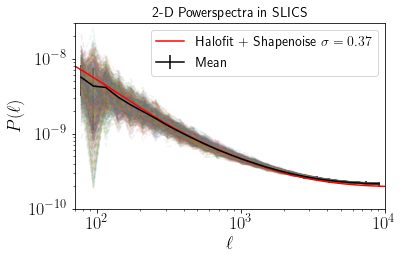

In [7]:
# Plot All powerspec and get combined data vector

all_powerspecs=np.zeros((Nlos, Nbins))

initPlot()

fig, ax=plt.subplots()

ax.set_title('2-D Powerspectra in SLICS')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$P(\ell)$')
ax.set_xlim(70, 1e4)
ax.set_ylim(1e-10, 3e-8)
for i, los in enumerate(los_list):
    if(los not in bogus_los):
        data=np.load(folder_slics_meas+"powerspec_slics_los_"+los+".npy")
        ax.plot(ell_bins, data, ls='--', alpha=0.1)
        all_powerspecs[i]=data

powerspec_mean=np.mean(all_powerspecs, axis=0)
powerspec_std=np.std(all_powerspecs, axis=0)
ax.errorbar(ell_bins, powerspec_mean, yerr=powerspec_std, color='k', label='Mean')

powerspec_model=np.loadtxt("../necessary_files/p_ell_slics_shapenoise_0.37.dat")
#powerspec_model=np.loadtxt(folder_slics_meas+"../model_powerspectrum.dat")
ax.plot(powerspec_model[:,0], powerspec_model[:,1], color='r', label=r'Halofit + Shapenoise $\sigma=0.37$')

finalizePlot(ax, showplot=True, outputFn=folder_slics_meas+"all_powerspec.png")

/home/laila/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/laila/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)


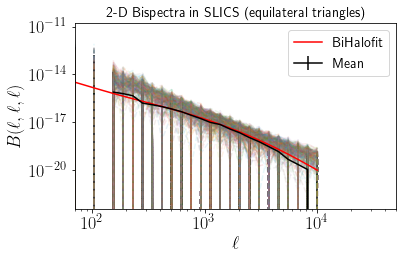

In [99]:
# Plot all Bispectrum and get combined data vector

all_bispecs_eq=np.zeros((Nlos, Nbins+1))
all_bispecs=np.zeros((Nlos, Nbins+1, Nbins+1, Nbins+1))

initPlot()

fig, ax=plt.subplots()

ax.set_title('2-D Bispectra in SLICS (equilateral triangles)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$B(\ell, \ell, \ell)$')
ax.set_xlim(70, 5e4)
#ax.set_ylim(1e-10, 3e-8)
for i, los in enumerate(los_list):
    if(los not in bogus_los):
        data=np.load(folder_slics_meas+"bispec_slics_los_"+los+".npy")
        data_eq=np.array([data[j,j,j] for j in range(0, Nbins+1)])
        ax.plot(ell_array, data_eq, ls='--', alpha=0.1)
        all_bispecs[i]=data
        all_bispecs_eq[i]=data_eq

bispec_eq_mean=np.mean(all_bispecs_eq, axis=0)
bispec_eq_std=np.std(all_bispecs_eq, axis=0)
ax.errorbar(ell_array, bispec_eq_mean, yerr=bispec_eq_std, color='k', label='Mean')

bispec_model=np.loadtxt(folder_slics_meas+"../model_bispectrum_diag.dat")

ax.plot(bispec_model[:,0], bispec_model[:,1], color='r', label=r'BiHalofit')

finalizePlot(ax, showplot=True, outputFn=folder_slics_meas+"all_bispec.png")

/home/laila/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


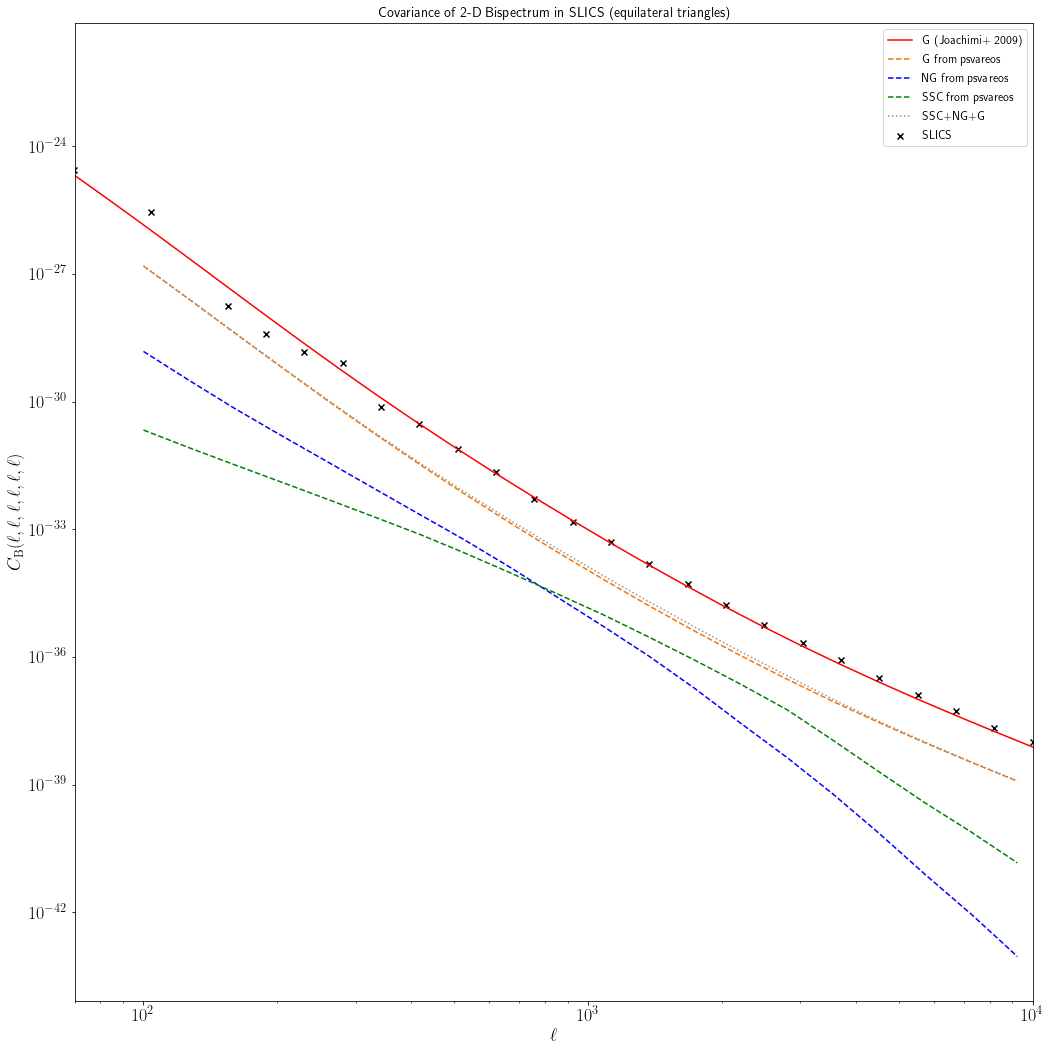

In [100]:
# Plot Bispec Cov of equilateral triangles

Cov_bispec_eq=np.cov(all_bispecs_eq.T)
Cov_bispec_eq.shape

initPlot(legendsize=12)


fig, ax= plt.subplots(figsize=(15,15))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C_\mathrm{B}(\ell, \ell, \ell, \ell, \ell, \ell)$')
ax.set_xlim(70, 1e4)
ax.scatter(ell_array, np.diag(Cov_bispec_eq), label='SLICS', marker='x', color='k')


# Our Gaussian Bispec Cov
cov_model=np.loadtxt(folder_slics_meas+"/../model_cov_bispectrum_diag_approx_degenerate_triangles.dat")
ax.plot(cov_model[:,0], cov_model[:,1], color='r', ls='-', label=r'G (Joachimi+ 2009)')

# G from PSvareos
cov_g_model=np.loadtxt(folder_slics_meas+"/../psvareos_out/bs_cov_g.dat")
ax.plot(cov_g_model[:,3], cov_g_model[:,12], color='xkcd:orange', ls='--', label='G from psvareos')

# NG from PSvareos
cov_ng_model=np.loadtxt(folder_slics_meas+"/../psvareos_out/bs_cov_ng.dat")
ax.plot(cov_ng_model[:,3], cov_ng_model[:,12], color='b', ls='--', label='NG from psvareos')

# SSC From PSvareos
cov_ssc_model=np.loadtxt(folder_slics_meas+"/../psvareos_out/bs_cov_ssc.dat")
ax.plot(cov_ssc_model[:,3], cov_ssc_model[:,12], color='g', ls='--', label='SSC from psvareos')

# Sum
#ax.plot(cov_ssc_model[:20,3], cov_ssc_model[:20,12]+cov_g_model[:20,12]+cov_ng_model[:,12], ls='-', color='k', label='SSC+NG+G (psvareos)')
ax.plot(cov_ssc_model[:20,3], cov_ssc_model[:20,12]+cov_ng_model[:20,12]+cov_g_model[:20,12], ls=':', color='xkcd:grey', label=r'SSC+NG+G')

ax.set_title("Covariance of 2-D Bispectrum in SLICS (equilateral triangles)")
finalizePlot(ax, showplot=True, outputFn=folder_slics_meas+"cov_bispec.png")




/home/laila/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


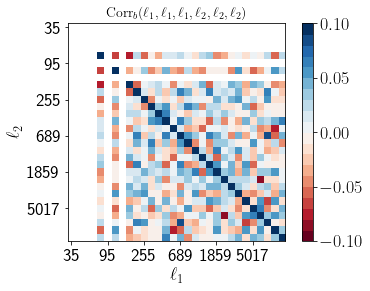

In [101]:
# Plot Correlation Matrix of bispec (equil. triangles)

cmap=cm.get_cmap('RdBu', 20)

Corr_bispec_eq = np.corrcoef(all_bispecs_eq.T)

fig, ax=plt.subplots()
ax.set_title(r"$\mathrm{Corr}_b (\ell_1, \ell_1, \ell_1, \ell_2, \ell_2, \ell_2)$")
ax.set_xlabel(r'$\ell_1$')
ax.set_xticks(np.arange(0, len(ell_bins), 5))
ax.set_xticklabels([f"{ell:.0f}" for ell in ell_bins[::5]])
ax.set_ylabel(r'$\ell_2$')
ax.set_yticks(np.arange(0, len(ell_bins), 5))
ax.set_yticklabels([f"{ell:.0f}" for ell in ell_bins[::5]])
im=ax.imshow(Corr_bispec_eq, vmin=-0.1, vmax=0.1, cmap=cmap)
plt.colorbar(im)

/home/laila/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/laila/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/laila/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


[[        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 ...
 [        nan         nan         nan ...  1.          0.02594415
  -0.01196717]
 [        nan         nan         nan ...  0.02594415  1.
   0.01235781]
 [        nan         nan         nan ... -0.01196717  0.01235781
   1.        ]]


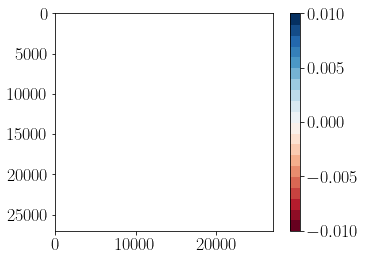

In [102]:
# Plot Correlation Matrix of bispec (non-equil. triangles)

cmap=cm.get_cmap('RdBu', 20)
all_bispecs=all_bispecs.reshape((928, 30*30*30))
np.nan_to_num(all_bispecs, copy=False)
Corr_bispec = np.corrcoef(all_bispecs.T)
print(Corr_bispec)

fig, ax=plt.subplots()
# ax.set_title(r"$\mathrm{Corr}_b (\ell_1, \ell_1, \ell_1, \ell_2, \ell_2, \ell_2)$")
# ax.set_xlabel(r'$\ell_1$')
# ax.set_xticks(np.arange(0, len(ell_bins), 5))
# ax.set_xticklabels([f"{ell:.0f}" for ell in ell_bins[::5]])
# ax.set_ylabel(r'$\ell_2$')
# ax.set_yticks(np.arange(0, len(ell_bins), 5))
#ax.set_yticklabels([f"{ell:.0f}" for ell in ell_bins[::5]])
im=ax.imshow(Corr_bispec, vmin=-0.01, vmax=0.01, cmap=cmap)
plt.colorbar(im)
plt.show()

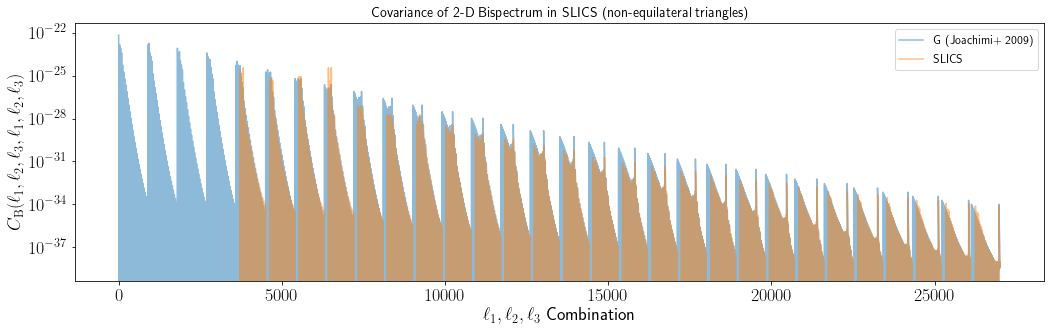

In [103]:
# Plot Bispec Cov of non-equilateral triangles

all_bispecs=all_bispecs.reshape((928, 30*30*30))
np.nan_to_num(all_bispecs, copy=False)

Cov_bispec=np.diag(np.cov(all_bispecs.T))



# Our Gaussian Bispec Cov
cov_model=np.loadtxt(folder_slics_meas+"/../model_cov_bispectrum_approx_degenerate_triangles.dat")[:,3]

fig,ax=plt.subplots(figsize=(15, 5))
ax.set_yscale('log')
#ax.set_xlim(3500, 4000)
ax.plot(cov_model, alpha=0.5, label='G (Joachimi+ 2009)')
ax.plot(Cov_bispec, alpha=0.5, label='SLICS')
ax.set_xlabel(r'$\ell_1, \ell_2, \ell_3$ Combination')
ax.set_ylabel(r'$C_\mathrm{B}(\ell_1, \ell_2, \ell_3, \ell_1, \ell_2, \ell_3)$')
ax.set_title("Covariance of 2-D Bispectrum in SLICS (non-equilateral triangles)")
finalizePlot(ax, showplot=True, outputFn=folder_slics_meas+"cov_bispec_non_equi.png")


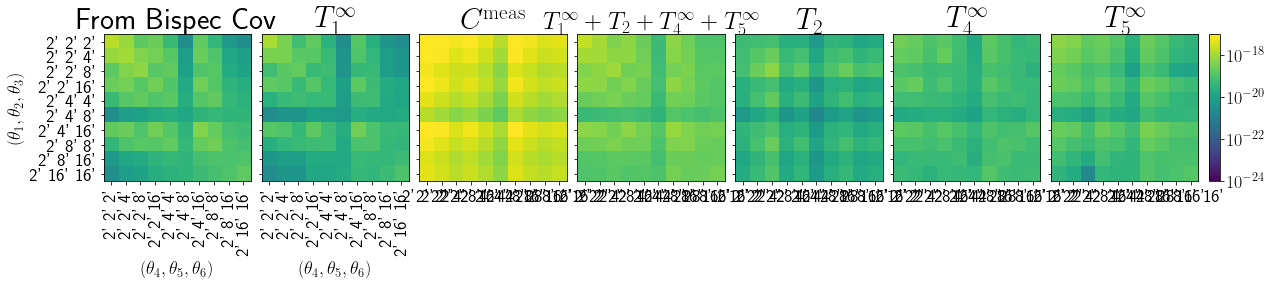

In [104]:
# Plot various Map3 Covs



thetas_ind = np.array([[2, 2, 2], [2, 2, 4], [2, 2, 8], [2, 2, 16],
                       [2, 4, 4], [2, 4, 8], [2, 4, 16], [2, 8, 8],
                       [2, 8, 16], [2, 16, 16], [4, 4, 4], [4, 4, 8],
                       [4, 4, 16], [4, 8, 8], [4, 8, 16], [4, 16, 16],
                       [8, 8, 8], [8, 8, 16], [8, 16, 16], [16, 16, 16]])
thetas_labels = []
for thetas in thetas_ind:
    thetas_labels.append(f"{thetas[0]}' {thetas[1]}' {thetas[2]}'")
N = len(thetas_ind)
thetas_ticks = np.arange(0, N)

cov_from_bispec=np.loadtxt(folder_slics_meas+"../cov_map3_from_bispec_cov.dat")
cov_T1=np.loadtxt(folder_slics_meas+"../cov_infinite_term1Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")
#cov_T1=np.loadtxt(folder_slics_meas+"../cov_square_term1Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")
cov_meas=np.loadtxt(folder_slics_meas+"../cov_SLICS_fft_sigma_0.37_n_108000.00_thetaMax_7.87.dat")
cov_T2=np.loadtxt(folder_slics_meas+"../cov_square_term2Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")
cov_T4=np.loadtxt(folder_slics_meas+"../cov_infinite_term4Numerical_sigma_0.26_n_107987.71_thetaMax_7.87_gpu.dat")*0.37*0.37/0.26/0.26
cov_T5=np.loadtxt(folder_slics_meas+"../cov_infinite_term5Numerical_sigma_0.26_n_107987.71_thetaMax_7.87_gpu.dat")*0.37*0.37/0.26/0.26


fig= plt.figure(figsize=(20, 10))
grid=ImageGrid(fig, 111, nrows_ncols=(1, 7), axes_pad=0.15, share_all=True, cbar_location="right", cbar_mode="single", cbar_size="7%", cbar_pad=0.15)

grid[0].set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
grid[0].set_yticks(thetas_ticks)
grid[0].set_yticklabels(thetas_labels)

grid[0].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
grid[0].set_xticks(thetas_ticks)
grid[0].set_xticklabels(thetas_labels, rotation=90)

grid[1].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
grid[1].set_xticks(thetas_ticks)
grid[1].set_xticklabels(thetas_labels, rotation=90)
ix=[1,2,3,5,6,8,11,12,14,17]

grid[0].set_title("From Bispec Cov", size=30)
grid[0].imshow(cov_from_bispec[ix,:][:,ix], norm=LogNorm(vmin=1e-24, vmax=1e-17))
grid[1].set_title(r"$T_1^{\infty}$", size=30)
grid[1].imshow(cov_T1[ix,:][:,ix], norm=LogNorm(vmin=1e-24, vmax=1e-17))
grid[2].set_title(r"$C^\mathrm{meas}$", size=30)
im=grid[2].imshow(cov_meas[ix,:][:,ix], norm=LogNorm(vmin=1e-24, vmax=1e-17))
grid[3].set_title(r"$T_1^{\infty} + T_2 + T_4^{\infty} + T_5^{\infty}$", size=25)
grid[3].imshow(cov_T1[ix,:][:,ix]+cov_T2[ix,:][:,ix]+cov_T4 +cov_T5, norm=LogNorm(vmin=1e-24, vmax=1e-17))
grid[4].set_title(r"$T_2$", size=30)
grid[4].imshow(cov_T2[ix,:][:,ix], norm=LogNorm(vmin=1e-24, vmax=1e-17))
grid[5].set_title(r"$T_4^{\infty}$", size=30)
grid[5].imshow(cov_T4, norm=LogNorm(vmin=1e-24, vmax=1e-17))
grid[6].set_title(r"$T_5^{\infty}$", size=30)
grid[6].imshow(cov_T5, norm=LogNorm(vmin=1e-24, vmax=1e-17))

grid[2].cax.cla()
mcb.Colorbar(grid[2].cax, im)

plt.savefig(folder_slics_meas+"/heatmaps.png")
plt.show()




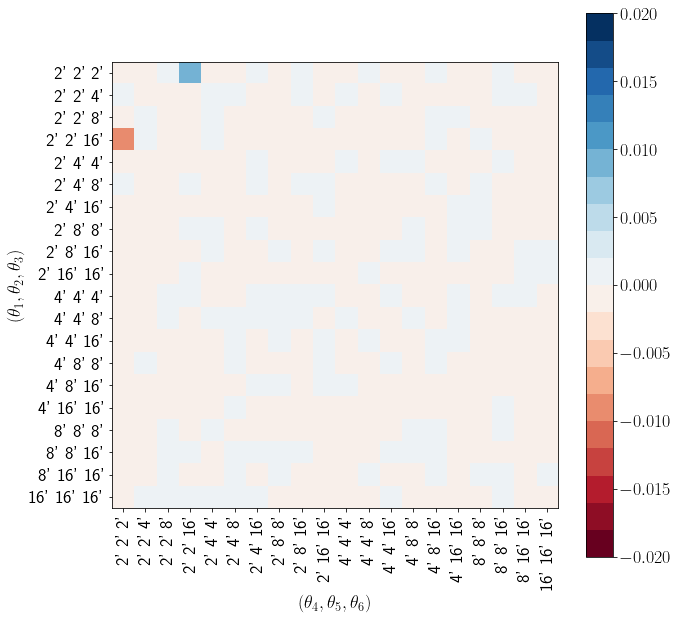

In [105]:
import matplotlib.cm as cm

cmap=cm.get_cmap('RdBu', 20)

fig, ax=plt.subplots(figsize=(10,10))

ax.set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
ax.set_yticks(thetas_ticks)
ax.set_yticklabels(thetas_labels)

ax.set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
ax.set_xticks(thetas_ticks)
ax.set_xticklabels(thetas_labels, rotation=90)


im=ax.imshow(2*(cov_T1-cov_T1.T)/(cov_T1+cov_T1.T), vmin=-0.02, vmax=0.02, cmap=cmap)
plt.colorbar(im)

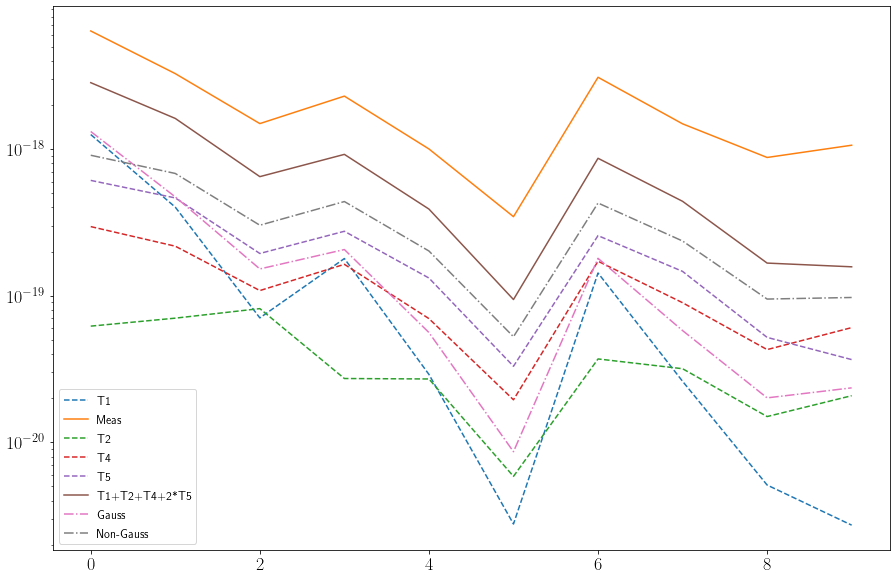

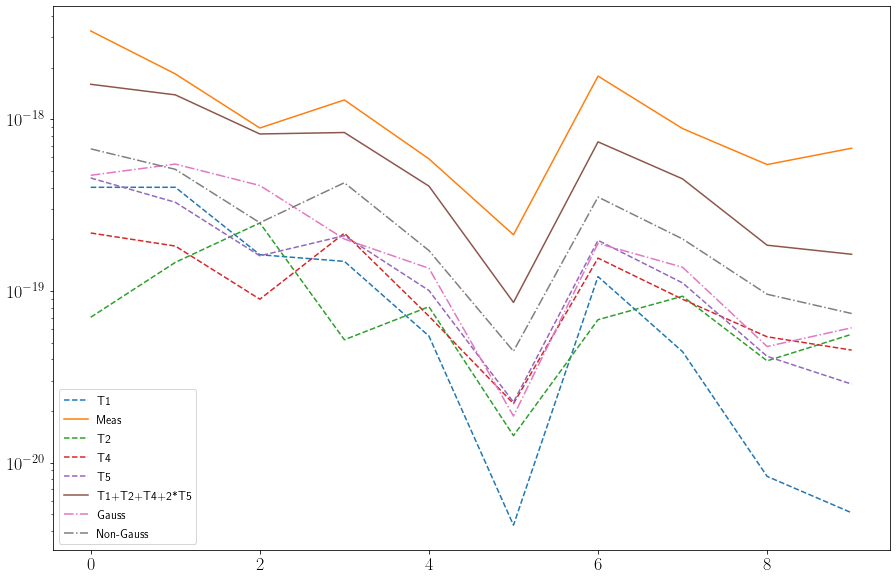

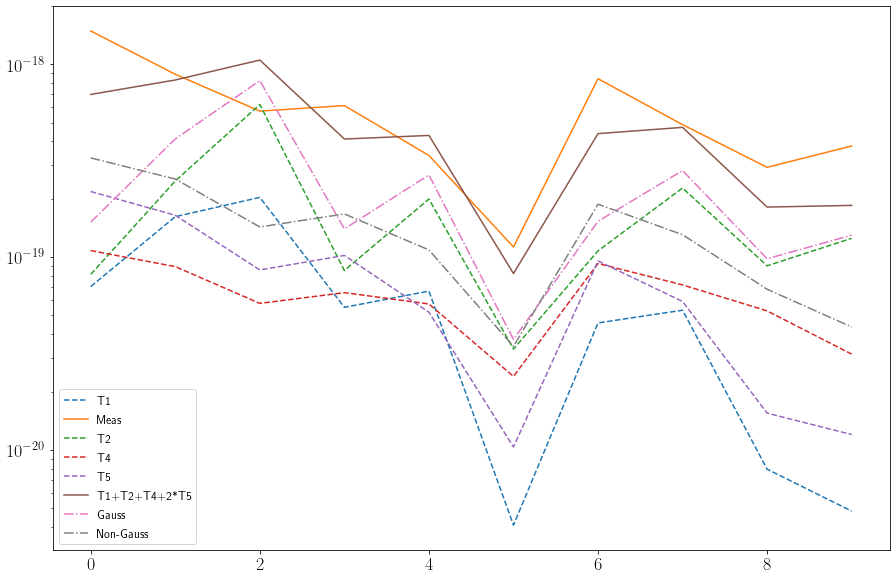

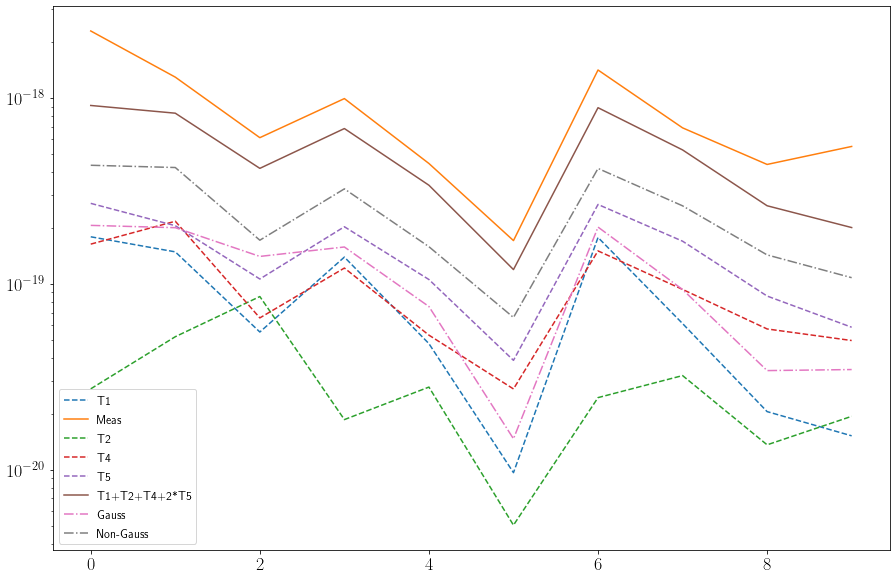

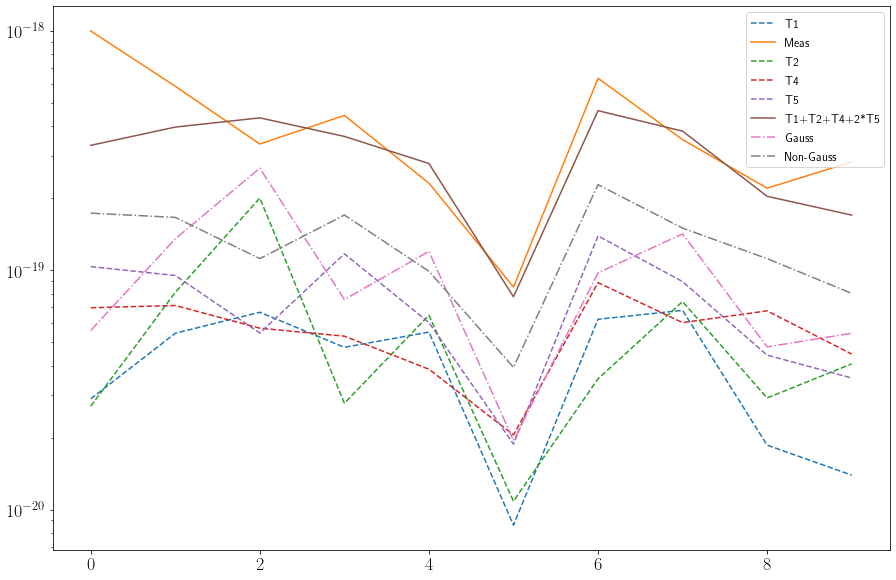

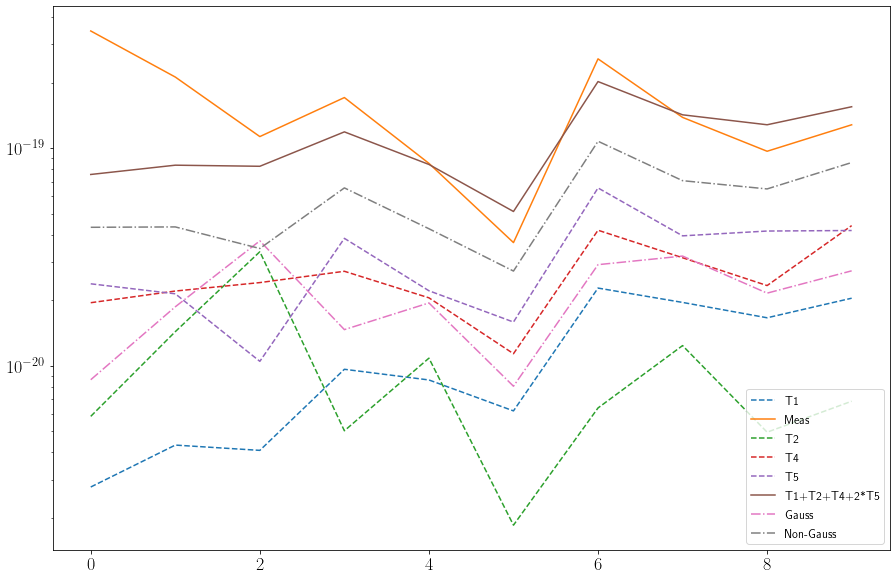

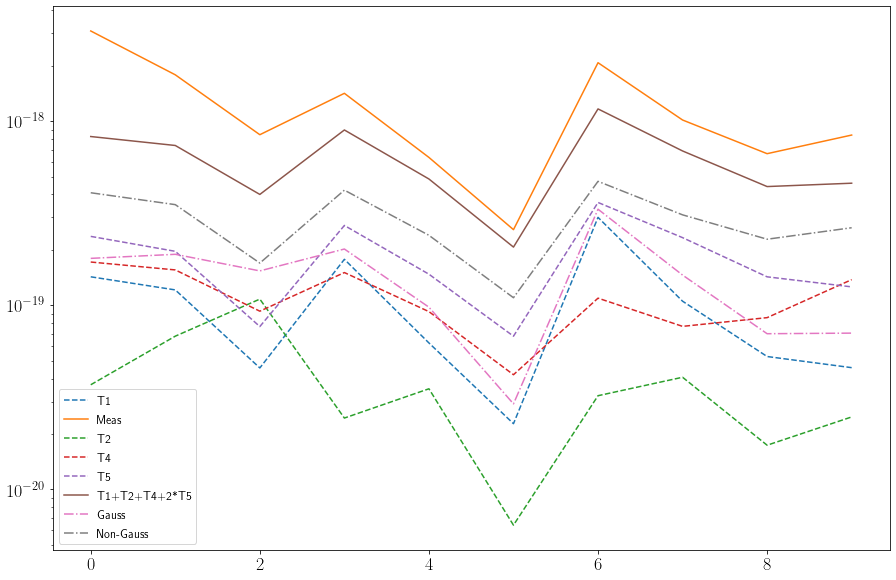

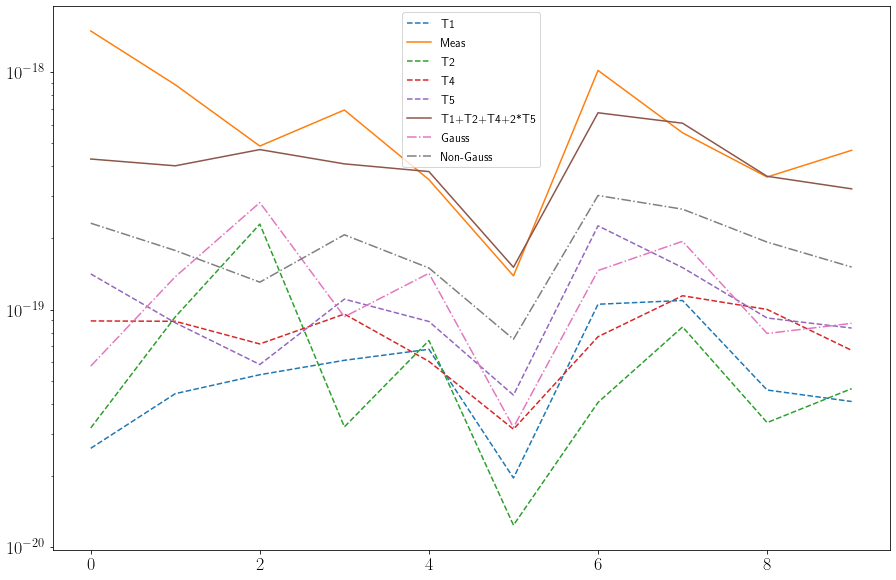

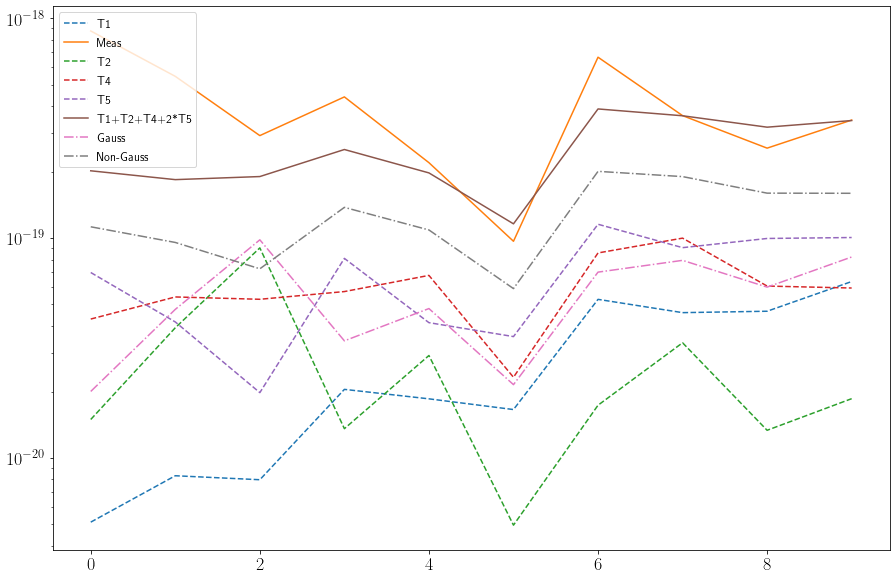

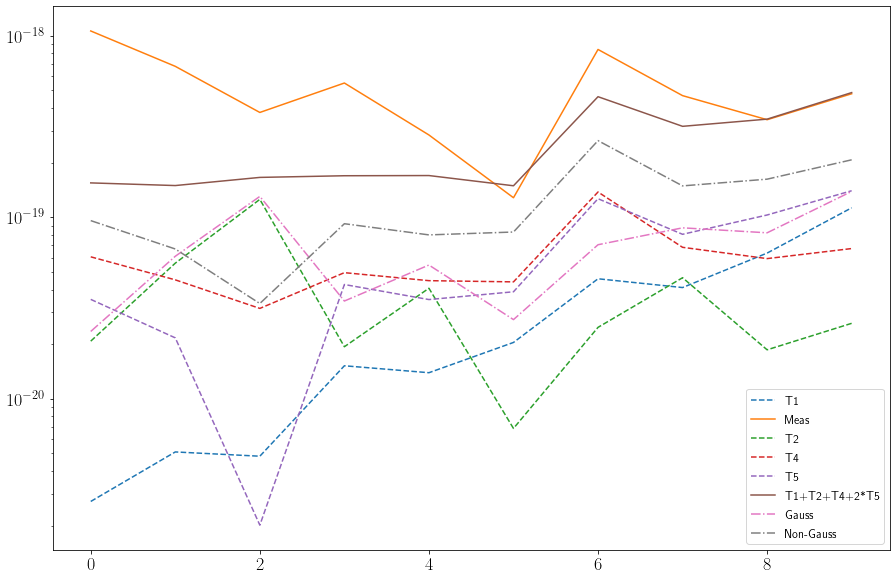

In [106]:
for j, i in enumerate(ix):
    plt.figure(figsize=(15,10))
    plt.yscale('log')
    #plt.plot(line, label='from bispec cov')
    plt.plot(cov_T1[i][ix], label='T1', ls='--')
    plt.plot(cov_meas[i][ix]/5, label='Meas')
    plt.plot(cov_T2[i][ix], label='T2', ls='--')
    plt.plot(cov_T4[j], label='T4', ls='--')
    plt.plot(cov_T5[j], label='T5', ls='--')
    plt.plot((cov_T1[i][ix]+cov_T2[i][ix]+cov_T4[j]+2*cov_T5[j]), label='T1+T2+T4+2*T5')
    plt.plot(cov_T1[i][ix]+cov_T2[i][ix], label='Gauss', ls='-.')
    plt.plot(cov_T4[j]+cov_T5[j], label='Non-Gauss', ls='-.')

    plt.legend()
    plt.show()

[39, 40, 44, 64]


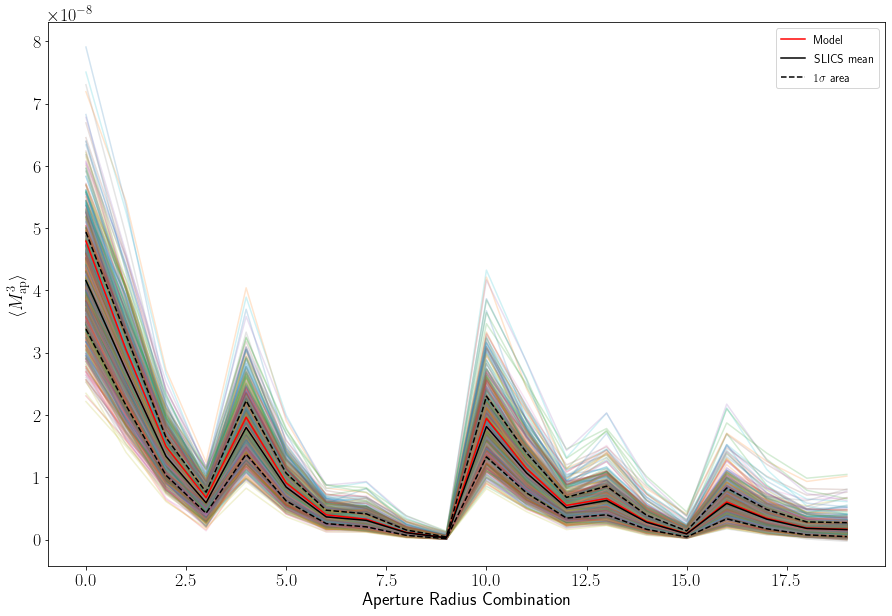

In [107]:
# Plot <Map³> from SLICS and model

Map3_meas=np.loadtxt("/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS/map_cubed")
Map3_model=np.loadtxt("/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS/MapMapMap_bispec_SLICS_fiducial.dat")

Map3_meas2=np.loadtxt("/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/results_HOWLS/fromGamma/map_cubed_our_thetas/SLICS_LCDM/map_cubed")

mean_meas=np.mean(Map3_meas, axis=0)
std_meas=np.std(Map3_meas-mean_meas, axis=0)

lst=[]
for i, line in enumerate(Map3_meas):
    if np.any(line < mean_meas-3*std_meas) or np.all(line > mean_meas+3*std_meas):
        lst.append(i)

print(lst)
Map3_meas=np.delete(Map3_meas, lst, axis=0)
mean_meas=np.mean(Map3_meas, axis=0)
std_meas=np.std(Map3_meas-mean_meas, axis=0)

delta_meas=Map3_meas-mean_meas
cov_meas = np.cov(delta_meas.T)
cov_meas_half = np.cov(delta_meas[:int(len(delta_meas)//2)].T)

fig, ax=plt.subplots(figsize=(15,10))
for i,line in enumerate(Map3_meas):
  #  ax.plot(np.arange(len(Map3_meas2[i])),Map3_meas2[i]+2e-8, color='xkcd:light blue')
  ax.plot(line,  alpha=0.2)

ax.plot(Map3_model[:,3], label='Model', color='r')
ax.plot(mean_meas, label='SLICS mean', color='k')
ax.plot(mean_meas+std_meas, label='$1\sigma$ area', color='k', ls='--')
ax.plot(mean_meas-std_meas,  color='k', ls='--')
ax.set_xlabel('Aperture Radius Combination')
ax.set_ylabel(r'$\langle M_\mathrm{ap}^3 \rangle$')

plt.legend()

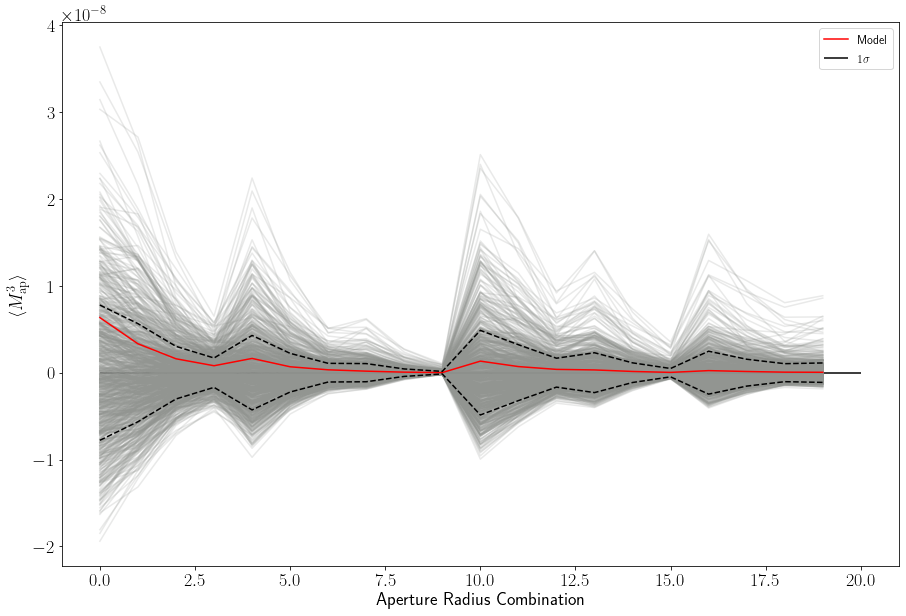

In [108]:
mean_meas=np.mean(Map3_meas, axis=0)
std_meas=np.std(Map3_meas-mean_meas, axis=0)

delta_meas=Map3_meas-mean_meas
cov_meas = np.cov(delta_meas.T)

fig, ax=plt.subplots(figsize=(15,10))
for line in delta_meas:
  #  ax.plot(np.arange(len(Map3_meas2[i])),Map3_meas2[i]+2e-8, color='xkcd:light blue')
    ax.plot(line, color='xkcd:grey', alpha=0.2)

ax.plot(Map3_model[:,3]-mean_meas, label='Model', color='r')
ax.plot(std_meas, color='k', ls='--')
ax.plot(-std_meas, color='k', ls='--')
ax.hlines(0, 0, 20, color='k', ls='-', label='$1\sigma$')
ax.set_xlabel('Aperture Radius Combination')
ax.set_ylabel(r'$\langle M_\mathrm{ap}^3 \rangle$')

plt.legend()

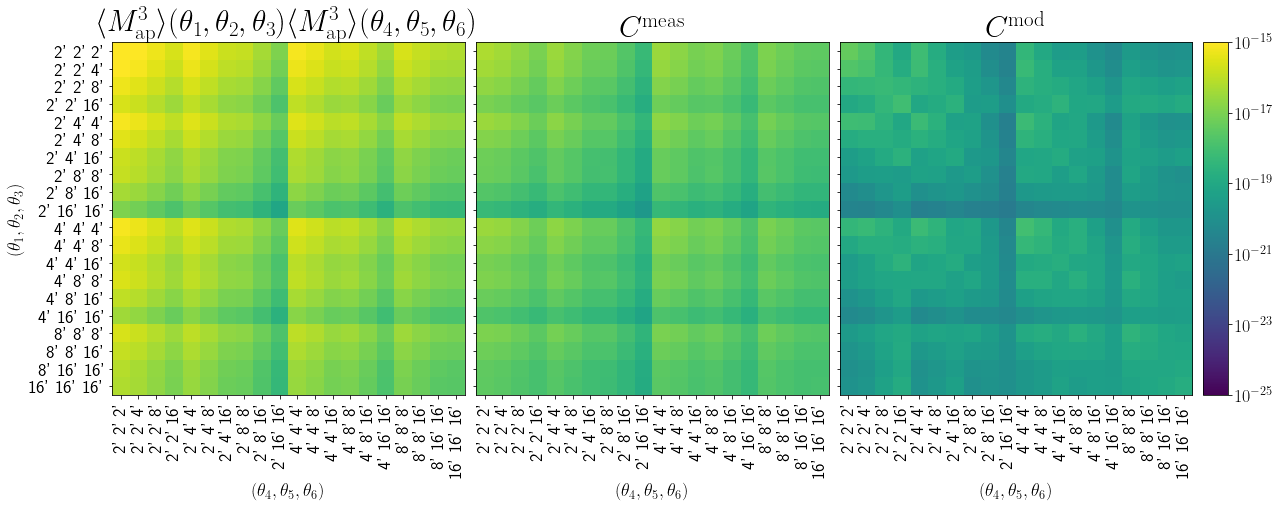

In [109]:
Map3_sq=np.outer(mean_meas,mean_meas)


fig= plt.figure(figsize=(20, 10))
grid=ImageGrid(fig, 111, nrows_ncols=(1, 3), axes_pad=0.15, share_all=True, cbar_location="right", cbar_mode="single", cbar_size="7%", cbar_pad=0.15)

grid[0].set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
grid[0].set_yticks(thetas_ticks)
grid[0].set_yticklabels(thetas_labels)

grid[0].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
grid[0].set_xticks(thetas_ticks)
grid[0].set_xticklabels(thetas_labels, rotation=90)

grid[1].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
grid[1].set_xticks(thetas_ticks)
grid[1].set_xticklabels(thetas_labels, rotation=90)

grid[2].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
grid[2].set_xticks(thetas_ticks)
grid[2].set_xticklabels(thetas_labels, rotation=90)

grid[0].set_title(r"$\langle M^3_\mathrm{ap}\rangle (\theta_1, \theta_2, \theta_3) \langle M^3_\mathrm{ap}\rangle (\theta_4, \theta_5, \theta_6)$", size=30)
grid[0].imshow(Map3_sq, norm=LogNorm(vmin=1e-25, vmax=1e-15))

grid[1].set_title(r"$C^\mathrm{meas}$", size=30)
im=grid[1].imshow(cov_meas, norm=LogNorm(vmin=1e-25, vmax=1e-15))

grid[2].set_title(r"$C^\mathrm{mod}$", size=30)
grid[2].imshow(cov_T1+cov_T2, norm=LogNorm(vmin=1e-25, vmax=1e-15))

grid[1].cax.cla()
mcb.Colorbar(grid[1].cax, im)

NameError: name 'cov_kappa' is not defined

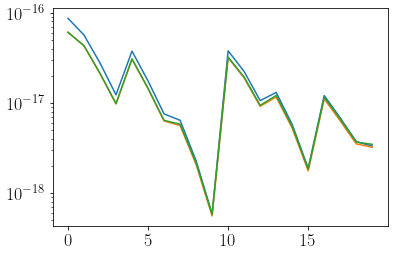

In [110]:
for i, line in enumerate(Map3_sq):
    plt.yscale('log')
    plt.plot(line/20, label=r'$\langle M^3_\mathrm{ap}\rangle (\theta_1, \theta_2, \theta_3) \langle M^3_\mathrm{ap}\rangle (\theta_4, \theta_5, \theta_6)$')
    plt.plot(cov_meas[i], label='Measured Cov')
    plt.plot(cov_meas_half[i], label='Measured Cov (half NLOS)')
    plt.plot(cov_kappa[i], label='From kappa')
    plt.plot(cov_T1[i]+cov_T2[i], label='Model Cov')
    plt.legend()
    plt.show()

In [ ]:
import matplotlib.cm as cm

cmap=cm.get_cmap('RdBu', 10)

im=plt.imshow(0.5*(cov_T1.T-cov_T1)/(cov_T1.T+cov_T1), vmin=-1e-4, vmax=1e-4, cmap=cmap)
plt.colorbar(im)

In [ ]:


im=plt.imshow(0.5*(cov_T2.T-cov_T2)/(cov_T2.T+cov_T2), vmin=-1e-4, vmax=1e-4, cmap=cmap)
plt.colorbar(im)

In [ ]:
map3_gamma=np.loadtxt('/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS/map_cubed')
map3_kappa=np.loadtxt('/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS/map_cubed_from_convergence.dat')

plt.figure(figsize=(15,10))
for i in range(928):
    plt.plot(map3_gamma[i], color='xkcd:blue', alpha=0.2, label=r'from $\gamma$')
    plt.plot(map3_kappa[i], color='xkcd:red', alpha=0.2, label=r'from $\kappa$')
    if(i==0):
        plt.legend(fontsize=40)

plt.show()

In [ ]:
cov_kappa=np.cov(map3_kappa.T)
cov_gamma=np.cov(map3_gamma.T)

fig, ax=plt.subplots(ncols=1, figsize=(10,10))
cmap=cm.get_cmap('RdBu', 8)
im=ax.imshow(2*(cov_kappa-cov_gamma)/(cov_kappa+cov_gamma), vmin=-0.04, vmax=0.04, cmap=cmap)
plt.title(r"$2\frac{C_{\kappa} - C_{\gamma}}{C_{\kappa} + C_{\gamma}}$", fontsize=40)

plt.colorbar(im)
plt.show()

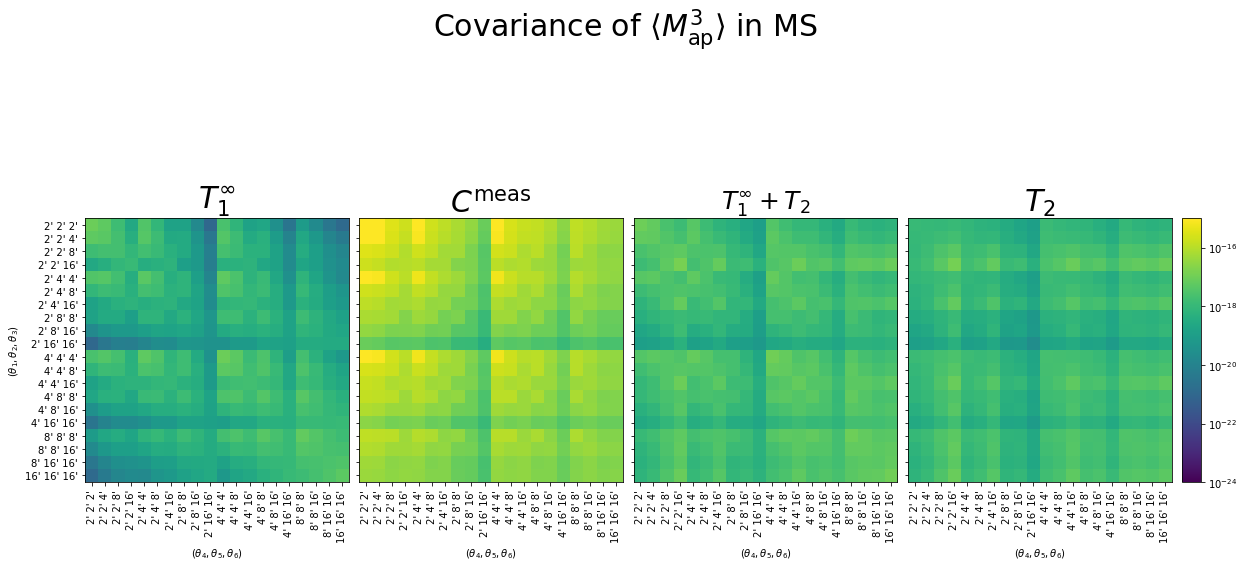

In [3]:
# Plots MS

# Plot various Map3 Covs

thetas_ind = np.array([[2, 2, 2], [2, 2, 4], [2, 2, 8], [2, 2, 16],
                       [2, 4, 4], [2, 4, 8], [2, 4, 16], [2, 8, 8],
                       [2, 8, 16], [2, 16, 16], [4, 4, 4], [4, 4, 8],
                       [4, 4, 16], [4, 8, 8], [4, 8, 16], [4, 16, 16],
                       [8, 8, 8], [8, 8, 16], [8, 16, 16], [16, 16, 16]])
thetas_labels = []
for thetas in thetas_ind:
    thetas_labels.append(f"{thetas[0]}' {thetas[1]}' {thetas[2]}'")
N = len(thetas_ind)
thetas_ticks = np.arange(0, N)

folder="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/MS/"
cov_T1=np.loadtxt(folder+"/cov_infinite_term1Numerical_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")
cov_meas=np.loadtxt(folder+"/cov_MS_fft_sigma_0.00_n_1048576.00_thetaMax_1.87.dat")
cov_T2=np.loadtxt(folder+"/cov_square_term2Numerical_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")
#cov_T4=np.loadtxt(folder+"/cov_infinite_term4Numerical_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")

fig= plt.figure(figsize=(20, 10))
plt.suptitle(r"Covariance of $\langle M_\mathrm{ap}^3\rangle$ in MS", fontsize=30)
grid=ImageGrid(fig, 111, nrows_ncols=(1, 4), axes_pad=0.15, share_all=True, cbar_location="right", cbar_mode="single", cbar_size="7%", cbar_pad=0.15)

grid[0].set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
grid[0].set_yticks(thetas_ticks)
grid[0].set_yticklabels(thetas_labels)

for g in grid:
    g.set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
    g.set_xticks(thetas_ticks)
    g.set_xticklabels(thetas_labels, rotation=90)


grid[0].set_title(r"$T_1^{\infty}$", size=30)
grid[0].imshow(cov_T1, norm=LogNorm(vmin=1e-24, vmax=1e-15))
grid[1].set_title(r"$C^\mathrm{meas}$", size=30)
im=grid[1].imshow(cov_meas, norm=LogNorm(vmin=1e-24, vmax=1e-15))
grid[2].set_title(r"$T_1^{\infty} + T_2$", size=25)
grid[2].imshow(cov_T1+cov_T2, norm=LogNorm(vmin=1e-24, vmax=1e-15))
grid[3].set_title(r"$T_2$", size=30)
grid[3].imshow(cov_T2, norm=LogNorm(vmin=1e-24, vmax=1e-15))


grid[2].cax.cla()
mcb.Colorbar(grid[2].cax, im)

plt.savefig(folder+"/heatmaps.png")
plt.show()




In [ ]:
for i, line in enumerate(cov_meas):
    fig, ax= plt.subplots(figsize=(15,10))
    ax.set_title(r'Covariance of $\langle M_\mathrm{ap} \rangle$ for '+thetas_labels[i]+" in MS")
    ax.set_yscale('log')
    ax.set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
    ax.set_xticks(thetas_ticks)
    ax.set_xticklabels(thetas_labels, rotation=45)
    ax.plot(cov_T1[i], label='T1', ls='--')
    ax.plot(cov_T2[i], label='T2', ls='-.')
    ax.plot(cov_T1[i]+cov_T2[i], label='T1+T2', ls='-')
    ax.plot(line, label='Meas')
    
    finalizePlot(ax, outputFn=folder+f"cov_map_{thetas_ind[i][0]}_{thetas_ind[i][1]}_{thetas_ind[i][2]}.png", showplot=False)

In [ ]:
# Plots SLICS

# Plot various Map3 Covs

thetas_ind = np.array([[2, 2, 2], [2, 2, 4], [2, 2, 8], [2, 2, 16],
                       [2, 4, 4], [2, 4, 8], [2, 4, 16], [2, 8, 8],
                       [2, 8, 16], [2, 16, 16], [4, 4, 4], [4, 4, 8],
                       [4, 4, 16], [4, 8, 8], [4, 8, 16], [4, 16, 16],
                       [8, 8, 8], [8, 8, 16], [8, 16, 16], [16, 16, 16]])
thetas_labels = []
for thetas in thetas_ind:
    thetas_labels.append(f"{thetas[0]}' {thetas[1]}' {thetas[2]}'")
N = len(thetas_ind)
thetas_ticks = np.arange(0, N)

folder="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS/"
cov_T1=np.loadtxt(folder+"/cov_infinite_term1Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")
cov_meas=np.loadtxt(folder+"/cov_SLICS_fft_sigma_0.37_n_108000.00_thetaMax_7.87.dat")
cov_T2=np.loadtxt(folder+"/cov_square_term2Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")
cov_T4=np.loadtxt(folder+"/cov_infinite_term4Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")
cov_T5=np.loadtxt(folder+"/cov_infinite_term5Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")

fig= plt.figure(figsize=(20, 10))
plt.suptitle(r"Covariance of $\langle M_\mathrm{ap}^3\rangle$ in SLICS", fontsize=30)
grid=ImageGrid(fig, 111, nrows_ncols=(1, 6), axes_pad=0.15, share_all=True, cbar_location="right", cbar_mode="single", cbar_size="7%", cbar_pad=0.15)

grid[0].set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
grid[0].set_yticks(thetas_ticks)
grid[0].set_yticklabels(thetas_labels)

for g in grid:
    g.set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
    g.set_xticks(thetas_ticks)
    g.set_xticklabels(thetas_labels, rotation=90)


grid[0].set_title(r"$T_1^{\infty}$", size=30)
grid[0].imshow(cov_T1, norm=LogNorm(vmin=1e-25, vmax=1e-16))
grid[1].set_title(r"$C^\mathrm{meas}$", size=30)
im=grid[1].imshow(cov_meas, norm=LogNorm(vmin=1e-25, vmax=1e-16))
grid[2].set_title(r"$T_1^{\infty} + T_2 + T_4^{\infty} + T_5^{\infty}$", size=25)
grid[2].imshow(cov_T1+cov_T2+cov_T4+cov_T5, norm=LogNorm(vmin=1e-25, vmax=1e-16))
grid[3].set_title(r"$T_2$", size=30)
grid[3].imshow(cov_T2, norm=LogNorm(vmin=1e-25, vmax=1e-16))
grid[4].set_title(r"$T_4^{\infty}$", size=30)
grid[4].imshow(cov_T4, norm=LogNorm(vmin=1e-25, vmax=1e-16))
grid[5].set_title(r"$T_5^{\infty}$", size=30)
grid[5].imshow(cov_T5, norm=LogNorm(vmin=1e-25, vmax=1e-16))


grid[2].cax.cla()
mcb.Colorbar(grid[2].cax, im)

plt.savefig(folder+"/heatmaps.png")
plt.show()




In [ ]:
for i, line in enumerate(cov_meas):
    fig, ax= plt.subplots(figsize=(15,10))
    ax.set_title(r'Covariance of $\langle M_\mathrm{ap} \rangle$ for '+thetas_labels[i]+" in SLICS")
    ax.set_yscale('log')
    ax.set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
    ax.set_xticks(thetas_ticks)
    ax.set_xticklabels(thetas_labels, rotation=45)
    ax.plot(cov_T1[i], label='T1', ls='--')
    ax.plot(cov_T2[i], label='T2', ls='-.')
    ax.plot(cov_T4[i], label='T4', ls='-.')
    ax.plot(cov_T5[i], label='T5', ls='-.')
    ax.plot(cov_T1[i]+cov_T2[i]+cov_T4[i]+cov_T5[i], label='T1+T2+T4+T5', ls='-')
    ax.plot(line, label='Meas')
    
    finalizePlot(ax, outputFn=folder+f"cov_map_{thetas_ind[i][0]}_{thetas_ind[i][1]}_{thetas_ind[i][2]}.png", showplot=False)

In [ ]:
# Plot Cov_SLICS/Cov_MS

folderSLICS="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS/"
cov_SLICS_meas=np.loadtxt(folderSLICS+"/cov_SLICS_fft_sigma_0.37_n_108000.00_thetaMax_7.87.dat")
folderMS="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/MS/"
cov_MS_meas=np.loadtxt(folderMS+"/cov_MS_fft_sigma_0.00_n_1048576.00_thetaMax_1.87.dat")

plt.imshow(cov_MS_meas/cov_SLICS_meas, cmap=cmap)
plt.colorbar()

In [196]:
# Plot Cov SLICS for additional shapenoise

T1_slics_sn05=np.loadtxt("/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS_sn0_5/cov_infinite_term1Numerical_sigma_0.87_n_107987.71_thetaMax_7.87_gpu.dat")
T2_slics_sn05=np.loadtxt("/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS_sn0_5/cov_square_term2Numerical_sigma_0.87_n_107987.71_thetaMax_7.87_gpu.dat")

Mapmeas_sn05=np.loadtxt("/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS_sn0_5/map_cubed")
cov_slics_sn05=np.cov(Mapmeas_sn05.T)

T1_slics_sn10=np.loadtxt("/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS_sn1_0/cov_infinite_term1Numerical_sigma_1.37_n_107987.71_thetaMax_7.87_gpu.dat")
T2_slics_sn10=np.loadtxt("/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS_sn1_0/cov_square_term2Numerical_sigma_1.37_n_107987.71_thetaMax_7.87_gpu.dat")
Mapmeas_sn10=np.loadtxt("/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS_sn1_0/map_cubed")
cov_slics_sn10=np.cov(Mapmeas_sn10.T)
T5_slics_sn10=np.loadtxt("/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS_sn1_0/cov_infinite_term5Numerical_sigma_1.37_n_107987.71_thetaMax_7.87_gpu.dat")

Mapmeas_sn20=np.loadtxt("/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS_sn2_0/map_cubed")
cov_slics_sn20=np.cov(Mapmeas_sn20.T)
print(Mapmeas_sn20.shape)
T1_slics_sn00=np.loadtxt("/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS/cov_infinite_term1Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")
T2_slics_sn00=np.loadtxt("/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS/cov_square_term2Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")
T4_slics_sn00=np.loadtxt("/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS/cov_infinite_term4Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")
T5_slics_sn00=np.loadtxt("/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS/cov_infinite_term5Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")
Mapmeas_sn00=np.loadtxt("/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS/map_cubed")
cov_slics_sn00=np.cov(Mapmeas_sn00.T)
cov_ssc_sn00=np.loadtxt("/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS/cov_SSC_sigma_0.3_n_107987.71_thetaMax_7.87_gpu.dat")

# fig, ax=plt.subplots(ncols=4, figsize=(20,7))

# ax[0].set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
# ax[0].set_yticks(thetas_ticks)
# ax[0].set_yticklabels(thetas_labels)

# for a in ax:
#     a.set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
#     a.set_xticks(thetas_ticks)
#     a.set_xticklabels(thetas_labels, rotation=90)


# ax[0].set_title("$T_1^\infty$")
# im=ax[0].imshow(T1_slics_addedSN, norm=LogNorm(vmin=1e-24, vmax=1e-16))
# ax[1].set_title("$T_2$")
# im=ax[1].imshow(T2_slics_addedSN, norm=LogNorm(vmin=1e-24, vmax=1e-16))
# ax[1].set_title("$T_1+T_2$")
# im=ax[1].imshow(T1_slics_addedSN+T2_slics_addedSN, norm=LogNorm(vmin=1e-24, vmax=1e-16))
# ax[2].set_title("$C_\mathrm{meas}$")
# im=ax[2].imshow(cov_meas, norm=LogNorm(vmin=1e-24, vmax=1e-16))
# ax[3].set_title("$C_\mathrm{meas}$ original shapenoise")
# im=ax[3].imshow(cov_meas_orig, norm=LogNorm(vmin=1e-24, vmax=1e-16))
# fig.colorbar(im, ax=ax.ravel().tolist())

(431, 20)


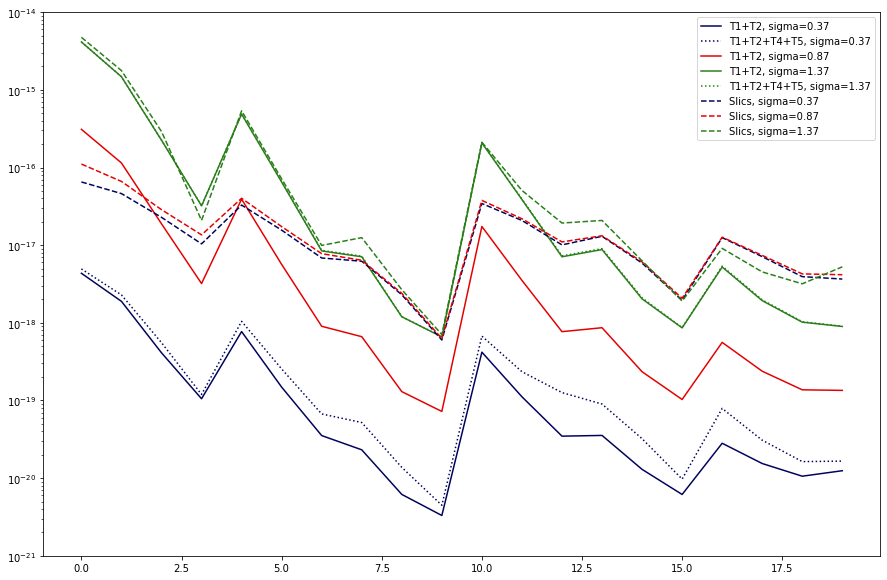

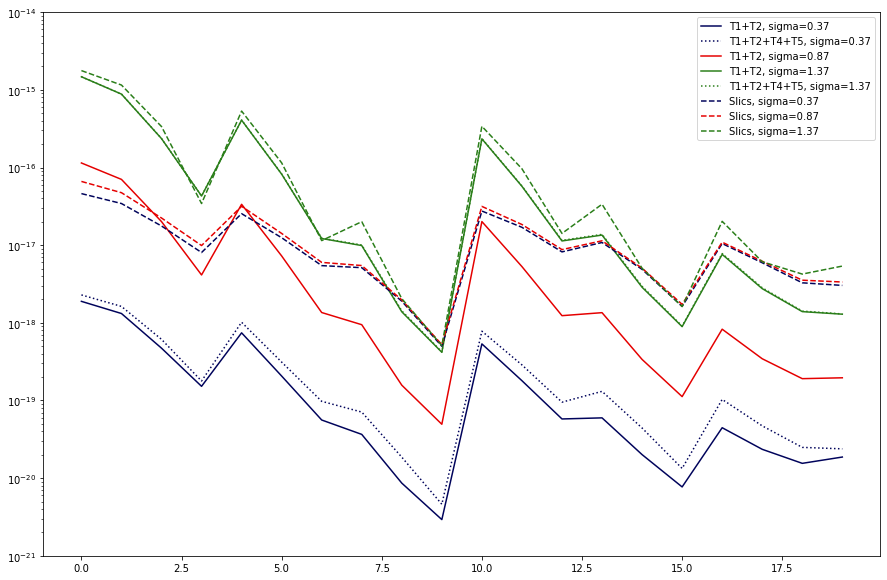

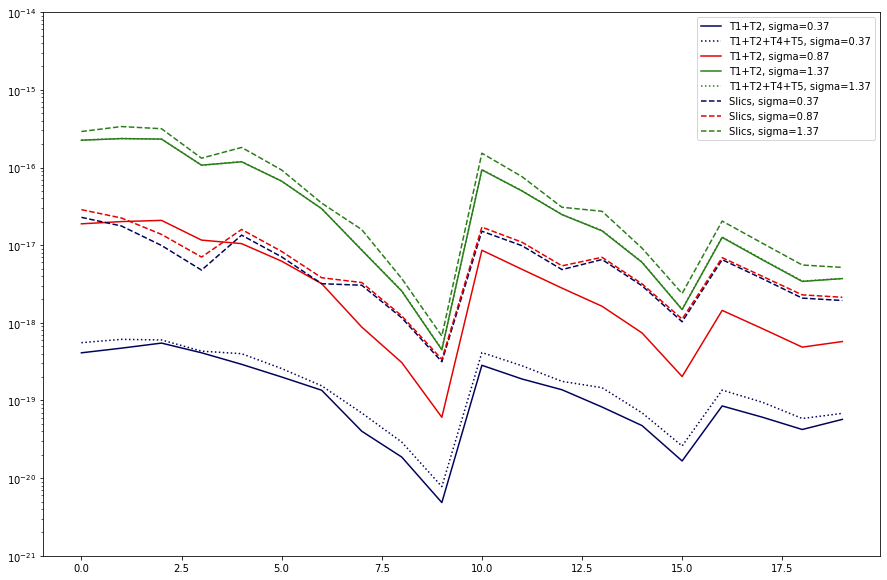

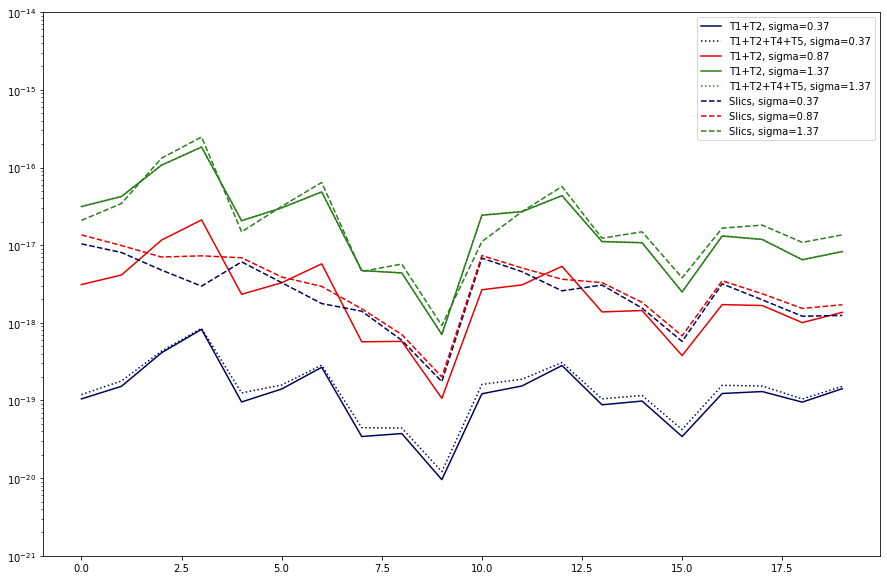

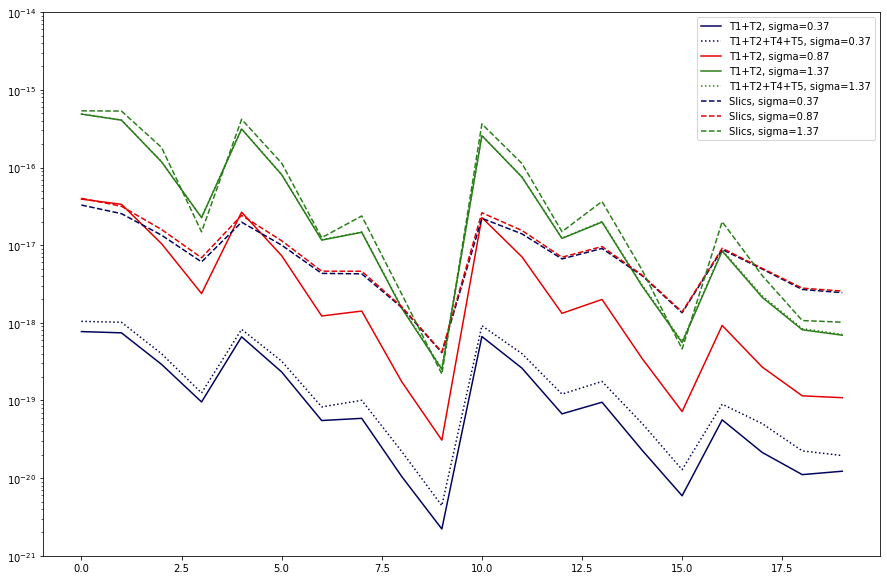

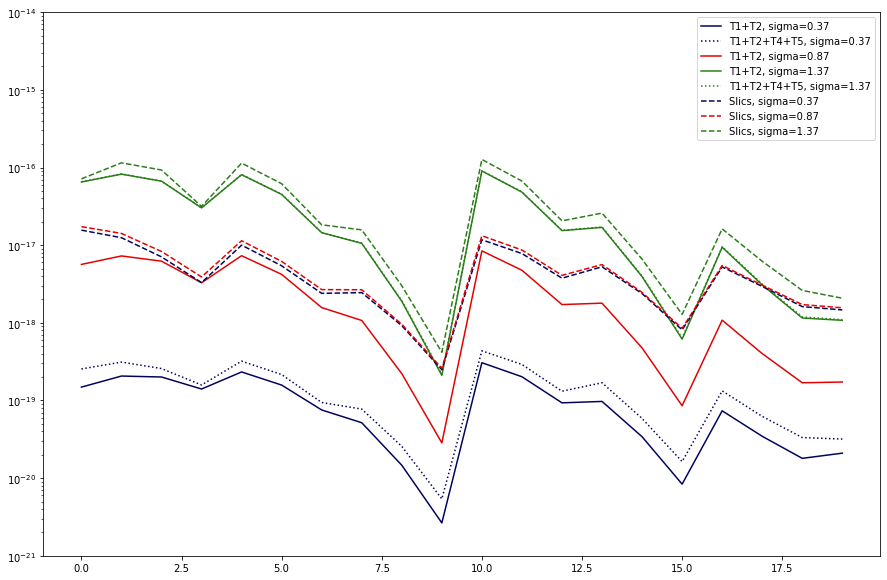

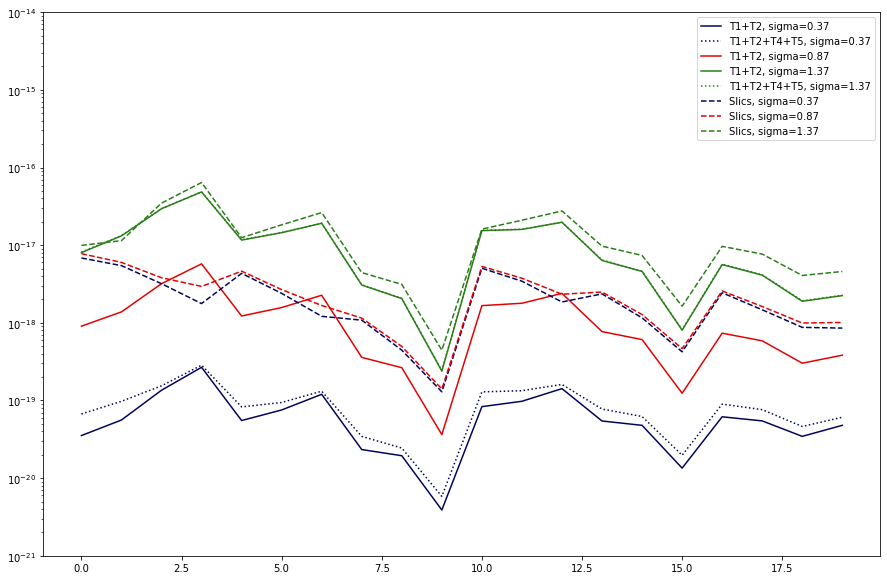

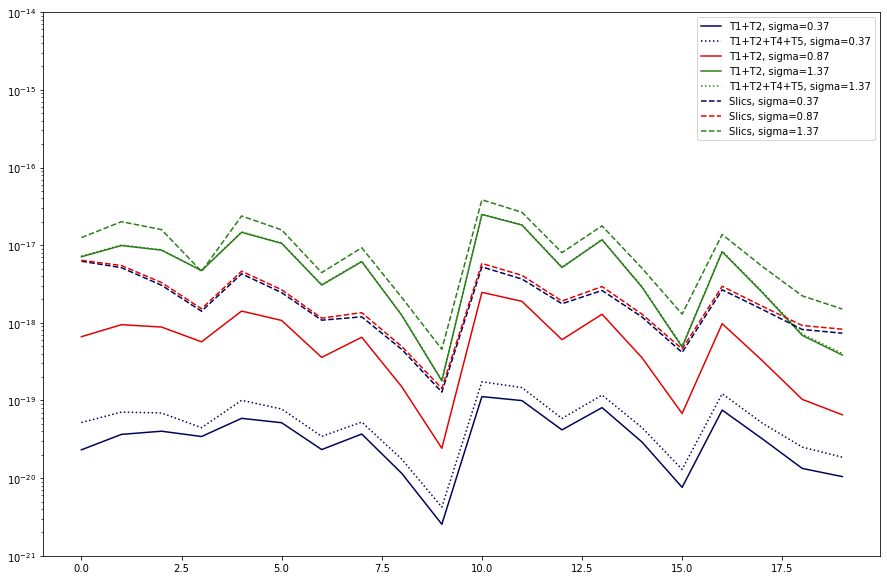

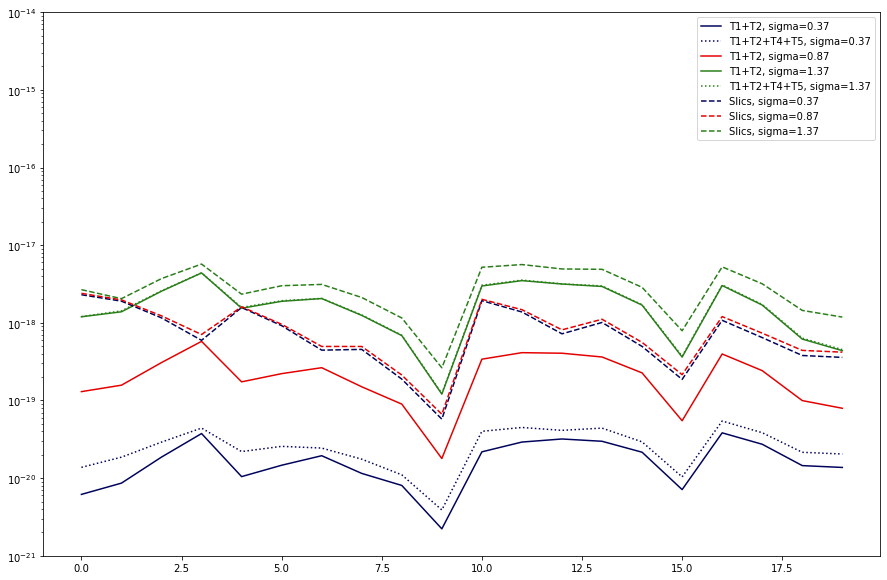

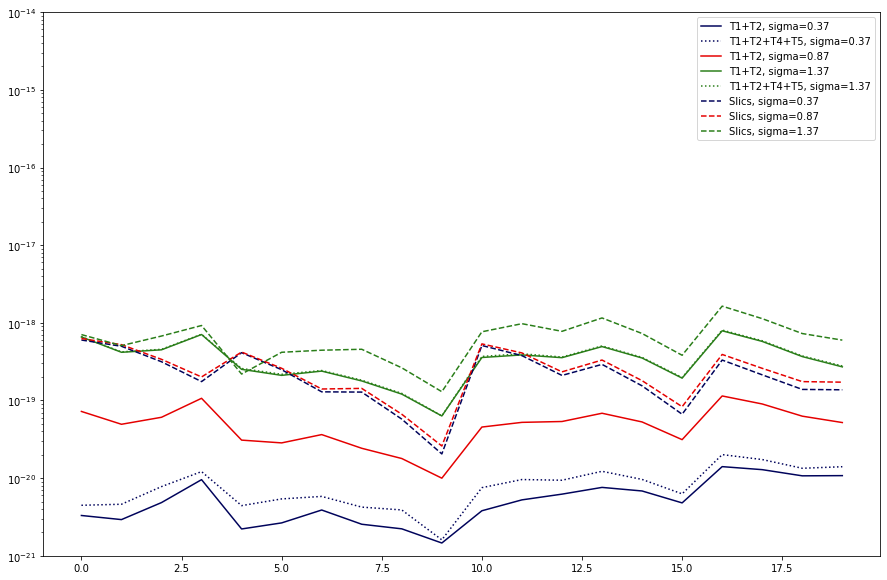

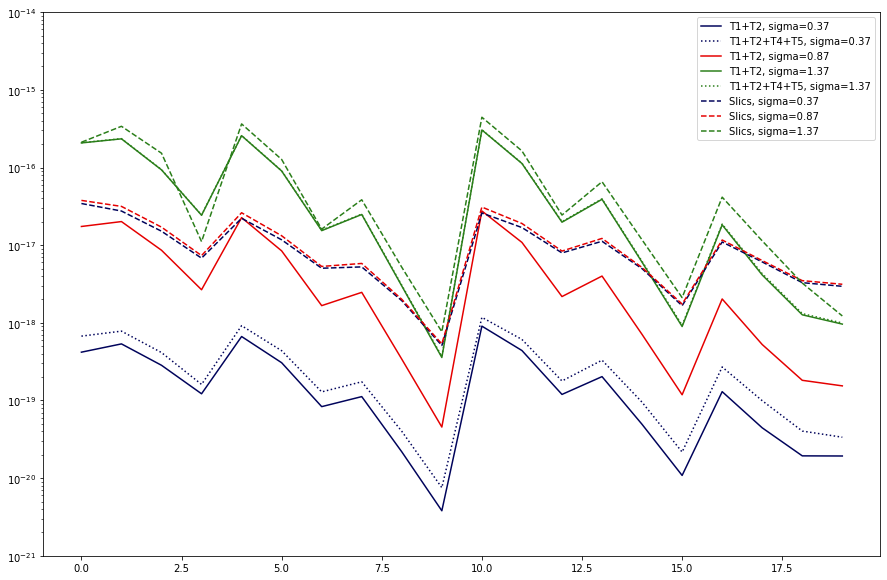

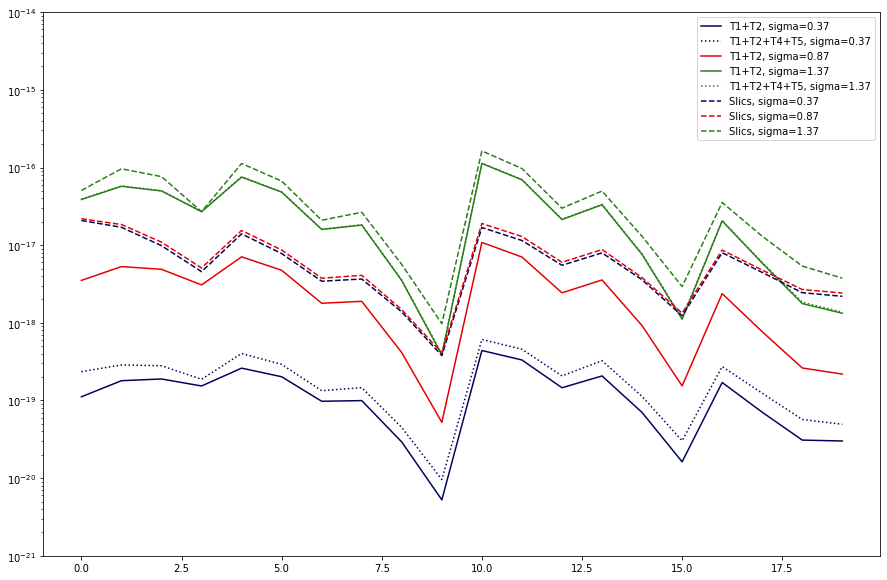

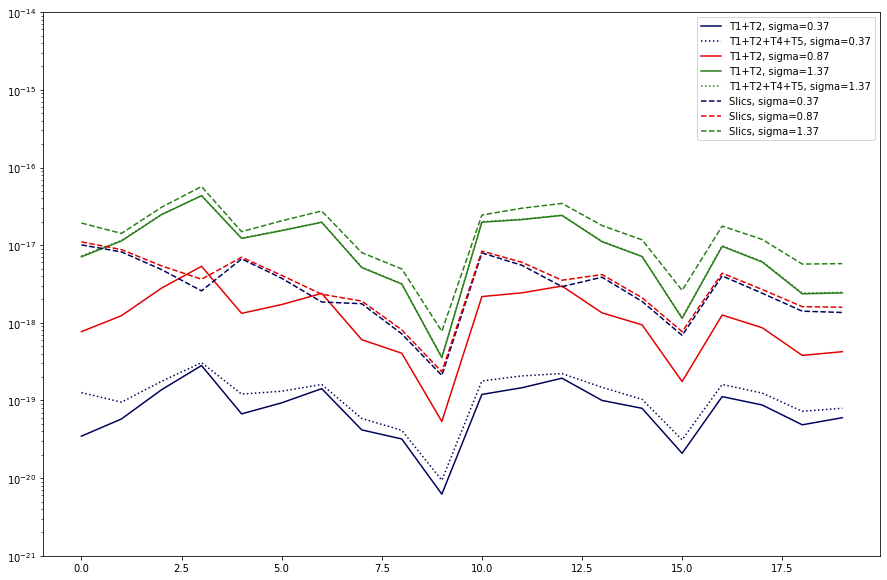

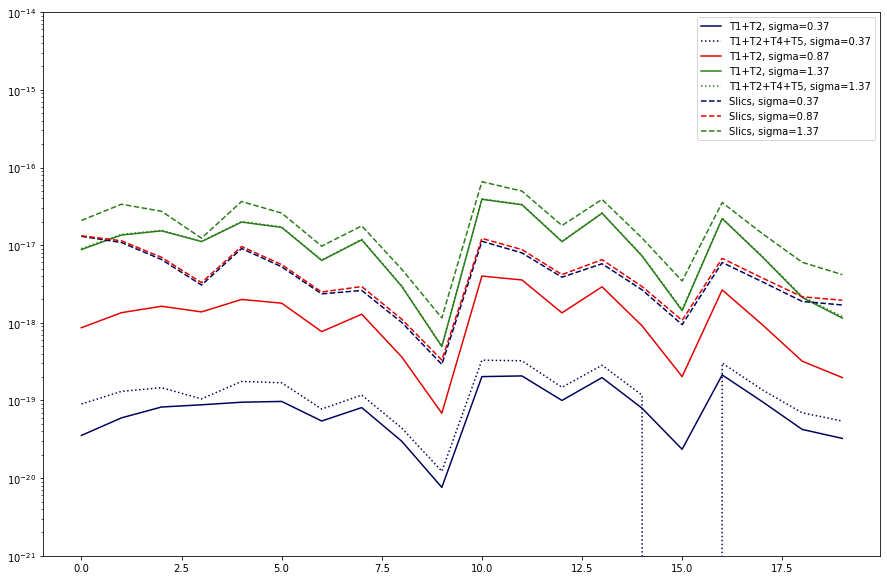

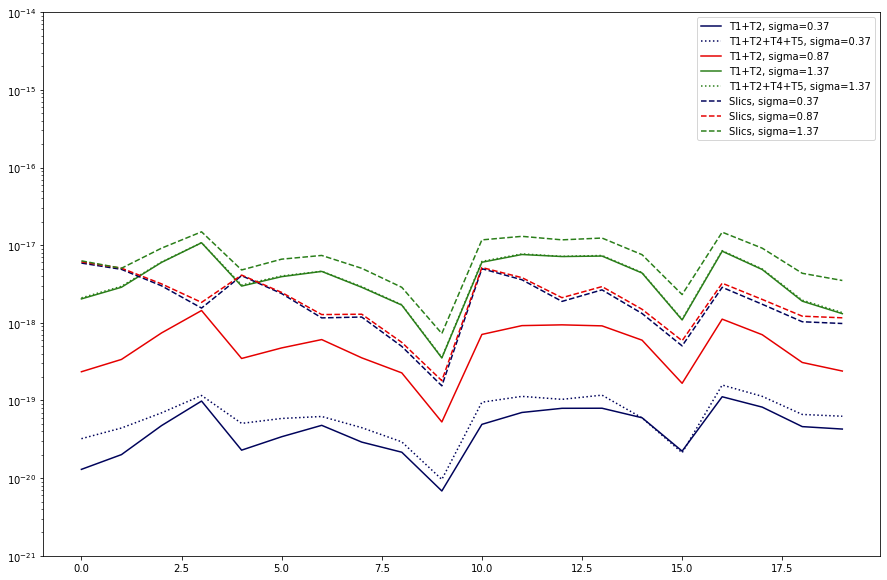

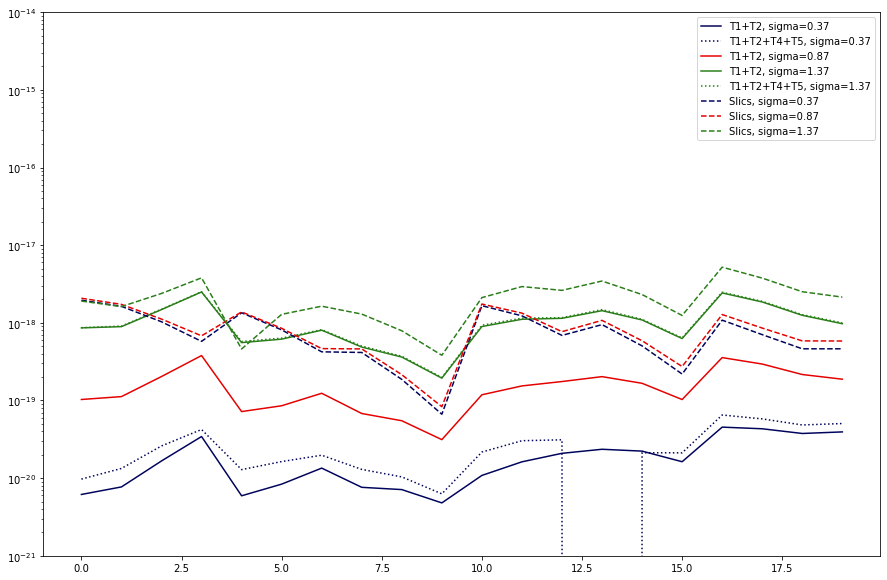

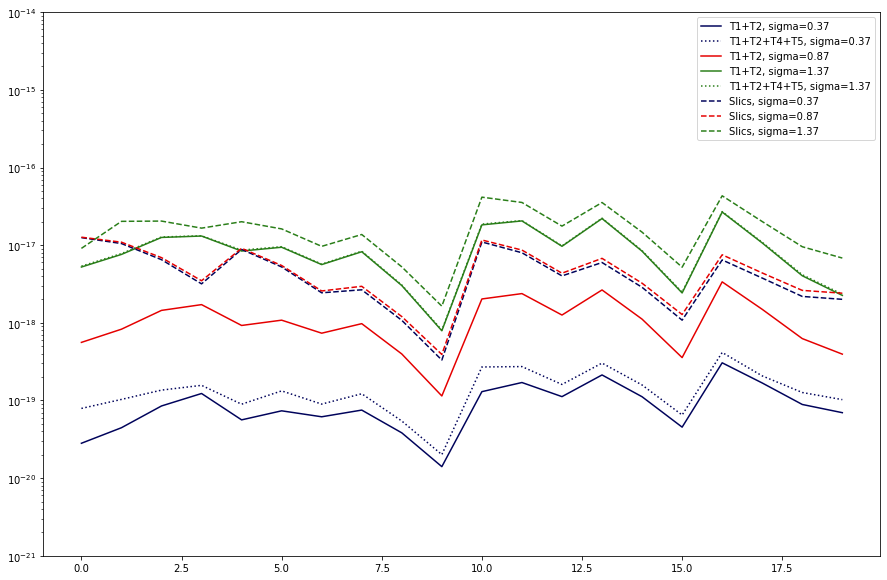

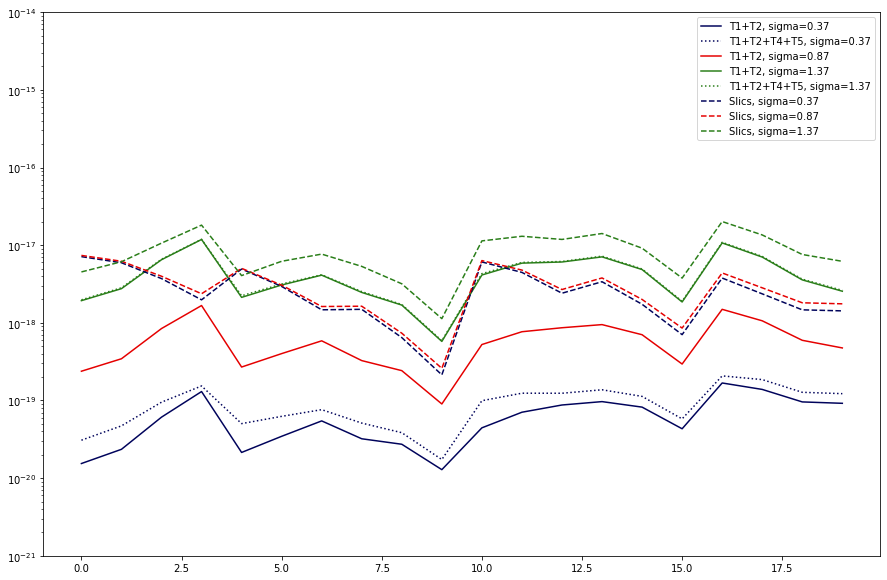

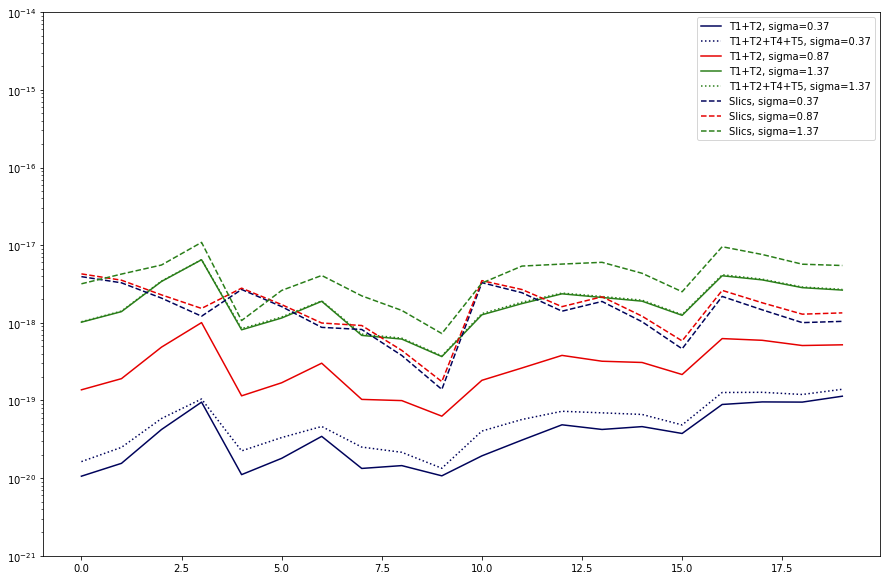

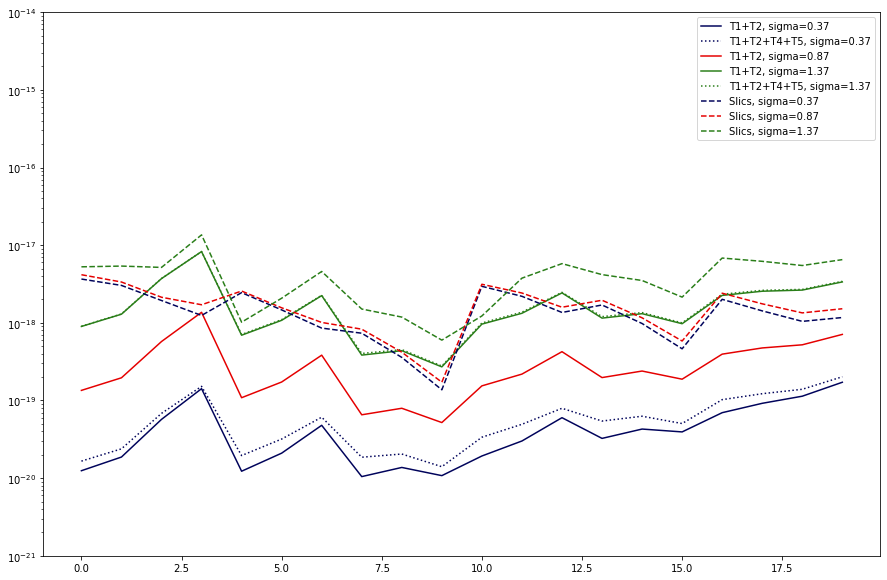

In [197]:
for i in range(20):
    plt.figure(figsize=(15,10))
    plt.yscale('log')
    plt.ylim((1e-21,1e-14))
    plt.plot((T1_slics_sn00+T2_slics_sn00)[i], label='T1+T2, sigma=0.37', color='xkcd:dark blue')
    plt.plot((T1_slics_sn00+T2_slics_sn00+T4_slics_sn00+T5_slics_sn00)[i], label='T1+T2+T4+T5, sigma=0.37', color='xkcd:dark blue', ls=':')
    plt.plot((T1_slics_sn05+T2_slics_sn05)[i], label='T1+T2, sigma=0.87', color='xkcd:red')

    plt.plot((T1_slics_sn10+T2_slics_sn10)[i], label='T1+T2, sigma=1.37', color='xkcd:tree green')
    plt.plot((T1_slics_sn10+T2_slics_sn10+T4_slics_sn00+T5_slics_sn10)[i], label='T1+T2+T4+T5, sigma=1.37', color='xkcd:tree green', ls=':')

    plt.plot(cov_slics_sn00[i], label='Slics, sigma=0.37', color='xkcd:dark blue', ls='--')
    plt.plot(cov_slics_sn05[i], label='Slics, sigma=0.87', color='xkcd:red', ls='--')
    plt.plot(cov_slics_sn10[i], label='Slics, sigma=1.37', color='xkcd:tree green', ls='--')
 #   plt.plot(cov_slics_sn20[i], label='Slics, sigma=2.37', color='xkcd:dark pink', ls='--')
 #   plt.plot(cov_ssc_sn00[i]*1e-20, ls='-.')
    plt.legend()

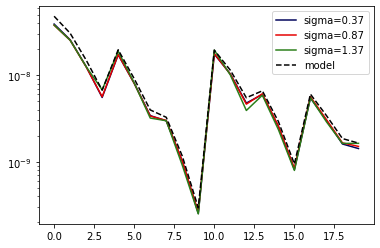

In [152]:
map3model=np.loadtxt("/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS/MapMapMap_bispec_SLICS_fiducial.dat")
plt.yscale('log')
map3mean_sn00=np.mean(Mapmeas_sn00, axis=0)

map3mean_sn05=np.mean(Mapmeas_sn05, axis=0)
map3mean_sn10=np.mean(Mapmeas_sn10, axis=0)
map3mean_sn20=np.mean(Mapmeas_sn20, axis=0)
plt.plot(map3mean_sn00,color='xkcd:dark blue', label='sigma=0.37')
plt.plot(map3mean_sn05, color='xkcd:red', label='sigma=0.87')
plt.plot(map3mean_sn10, color='xkcd:tree green', label='sigma=1.37')
#plt.plot(map3mean_sn20, color='xkcd:dark pink', label='sigma=2.37')
plt.plot(map3model[:,3], color='k', label='model', ls='--')
plt.legend()


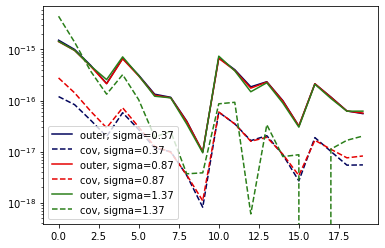

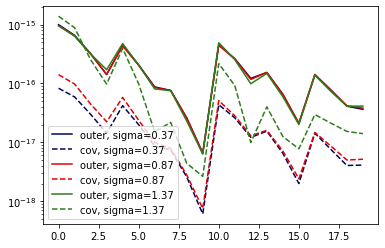

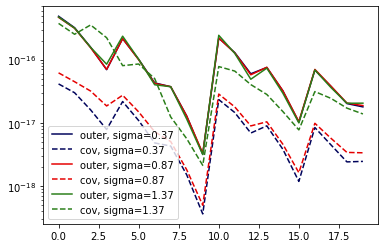

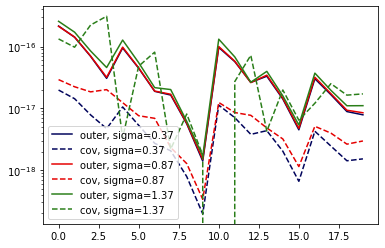

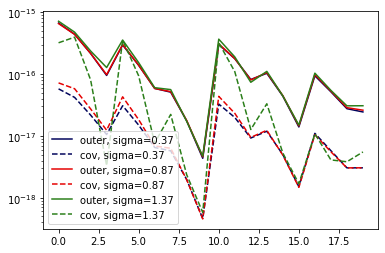

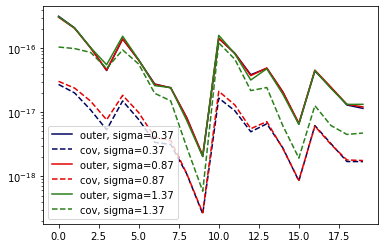

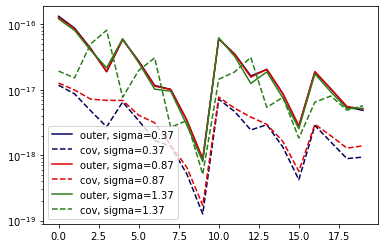

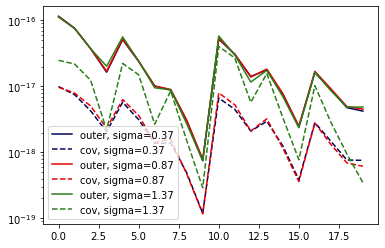

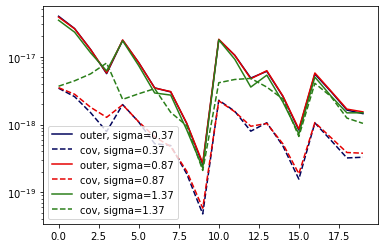

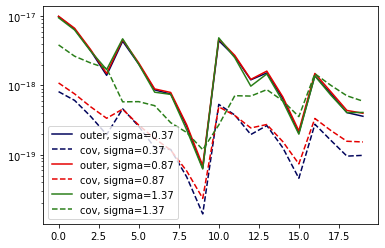

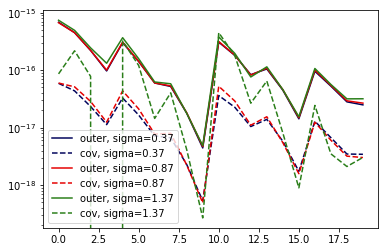

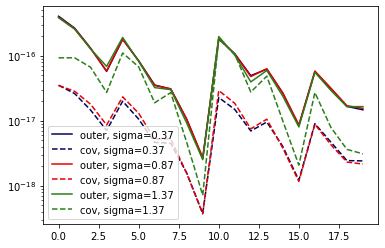

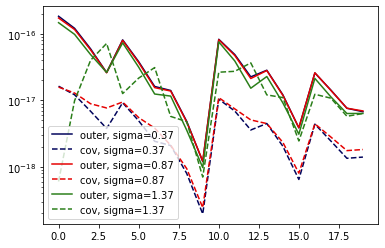

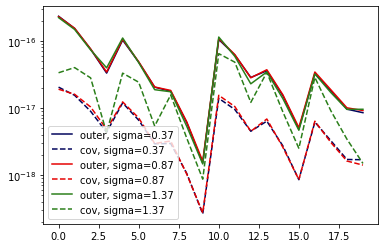

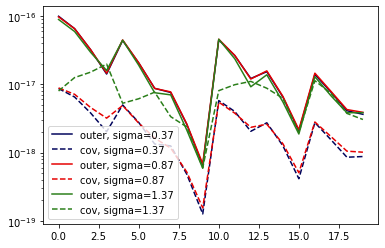

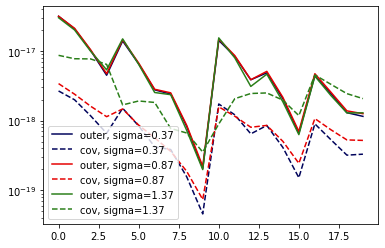

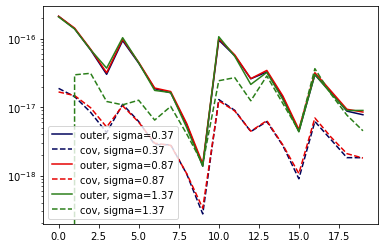

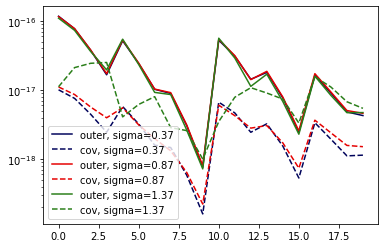

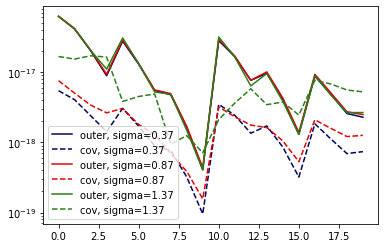

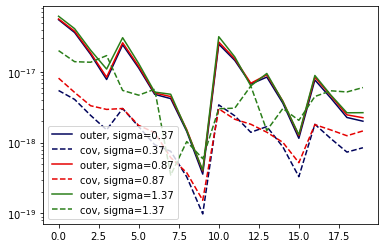

In [151]:
map_outer_sn00=np.outer(map3mean_sn00, map3mean_sn00)
map_outer_sn05=np.outer(map3mean_sn05, map3mean_sn05)
map_outer_sn10=np.outer(map3mean_sn10, map3mean_sn10)
for i in range(20):

    plt.figure()
    plt.yscale('log')
    plt.plot(map_outer_sn00[i], label='outer, sigma=0.37', color='xkcd:dark blue')
    plt.plot(cov_slics_sn00[i], label='cov, sigma=0.37', color='xkcd:dark blue', ls='--')
    plt.plot(map_outer_sn05[i], label='outer, sigma=0.87', color='xkcd:red')
    plt.plot(cov_slics_sn05[i], label='cov, sigma=0.87', color='xkcd:red', ls='--')
    plt.plot(map_outer_sn10[i], label='outer, sigma=1.37', color='xkcd:tree green')
    plt.plot(cov_slics_sn10[i], label='cov, sigma=1.37', color='xkcd:tree green', ls='--')
    plt.legend()